In [1]:
## Comparison of the Bayes scores

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Load datasets
B_Chi = np.load('/home/philcox/Save/New_SCORES/Chieffi/Bayes_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
B_Def = np.load('/home/philcox/Save/New_SCORES/Default/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
B_Ven = np.load('/home/philcox/Save/New_SCORES/Ventura/Bayes_score - Nomoto2013_net, Ventura, Seitenzahl.npz')
B_Thi = np.load('/home/philcox/Save/New_SCORES/Thielemann/Bayes_score - Nomoto2013_net, Karakas_net_yield, Thielemann.npz')
beta_param = B_Chi['beta_param']
scoreBC = B_Chi['score']
scoreBD = B_Def['score']
scoreBV = B_Ven['score']
scoreBT = B_Thi['score']
score_errBC = B_Chi['score_err']
score_errBD = B_Def['score_err']
score_errBV = B_Ven['score_err']
score_errBT = B_Thi['score_err']
B_Chi.close()
B_Def.close()
B_Ven.close()
B_Thi.close()

In [4]:
scores = [scoreBD,scoreBC,scoreBV,scoreBT]
errors = [score_errBD,score_errBC,score_errBV,score_errBT]
names = ['Default','+Chieffi04','+Ventura13', '+Thielemann03']
shapes = ['x','v','.','^']
colors = ['k','r','b','g']

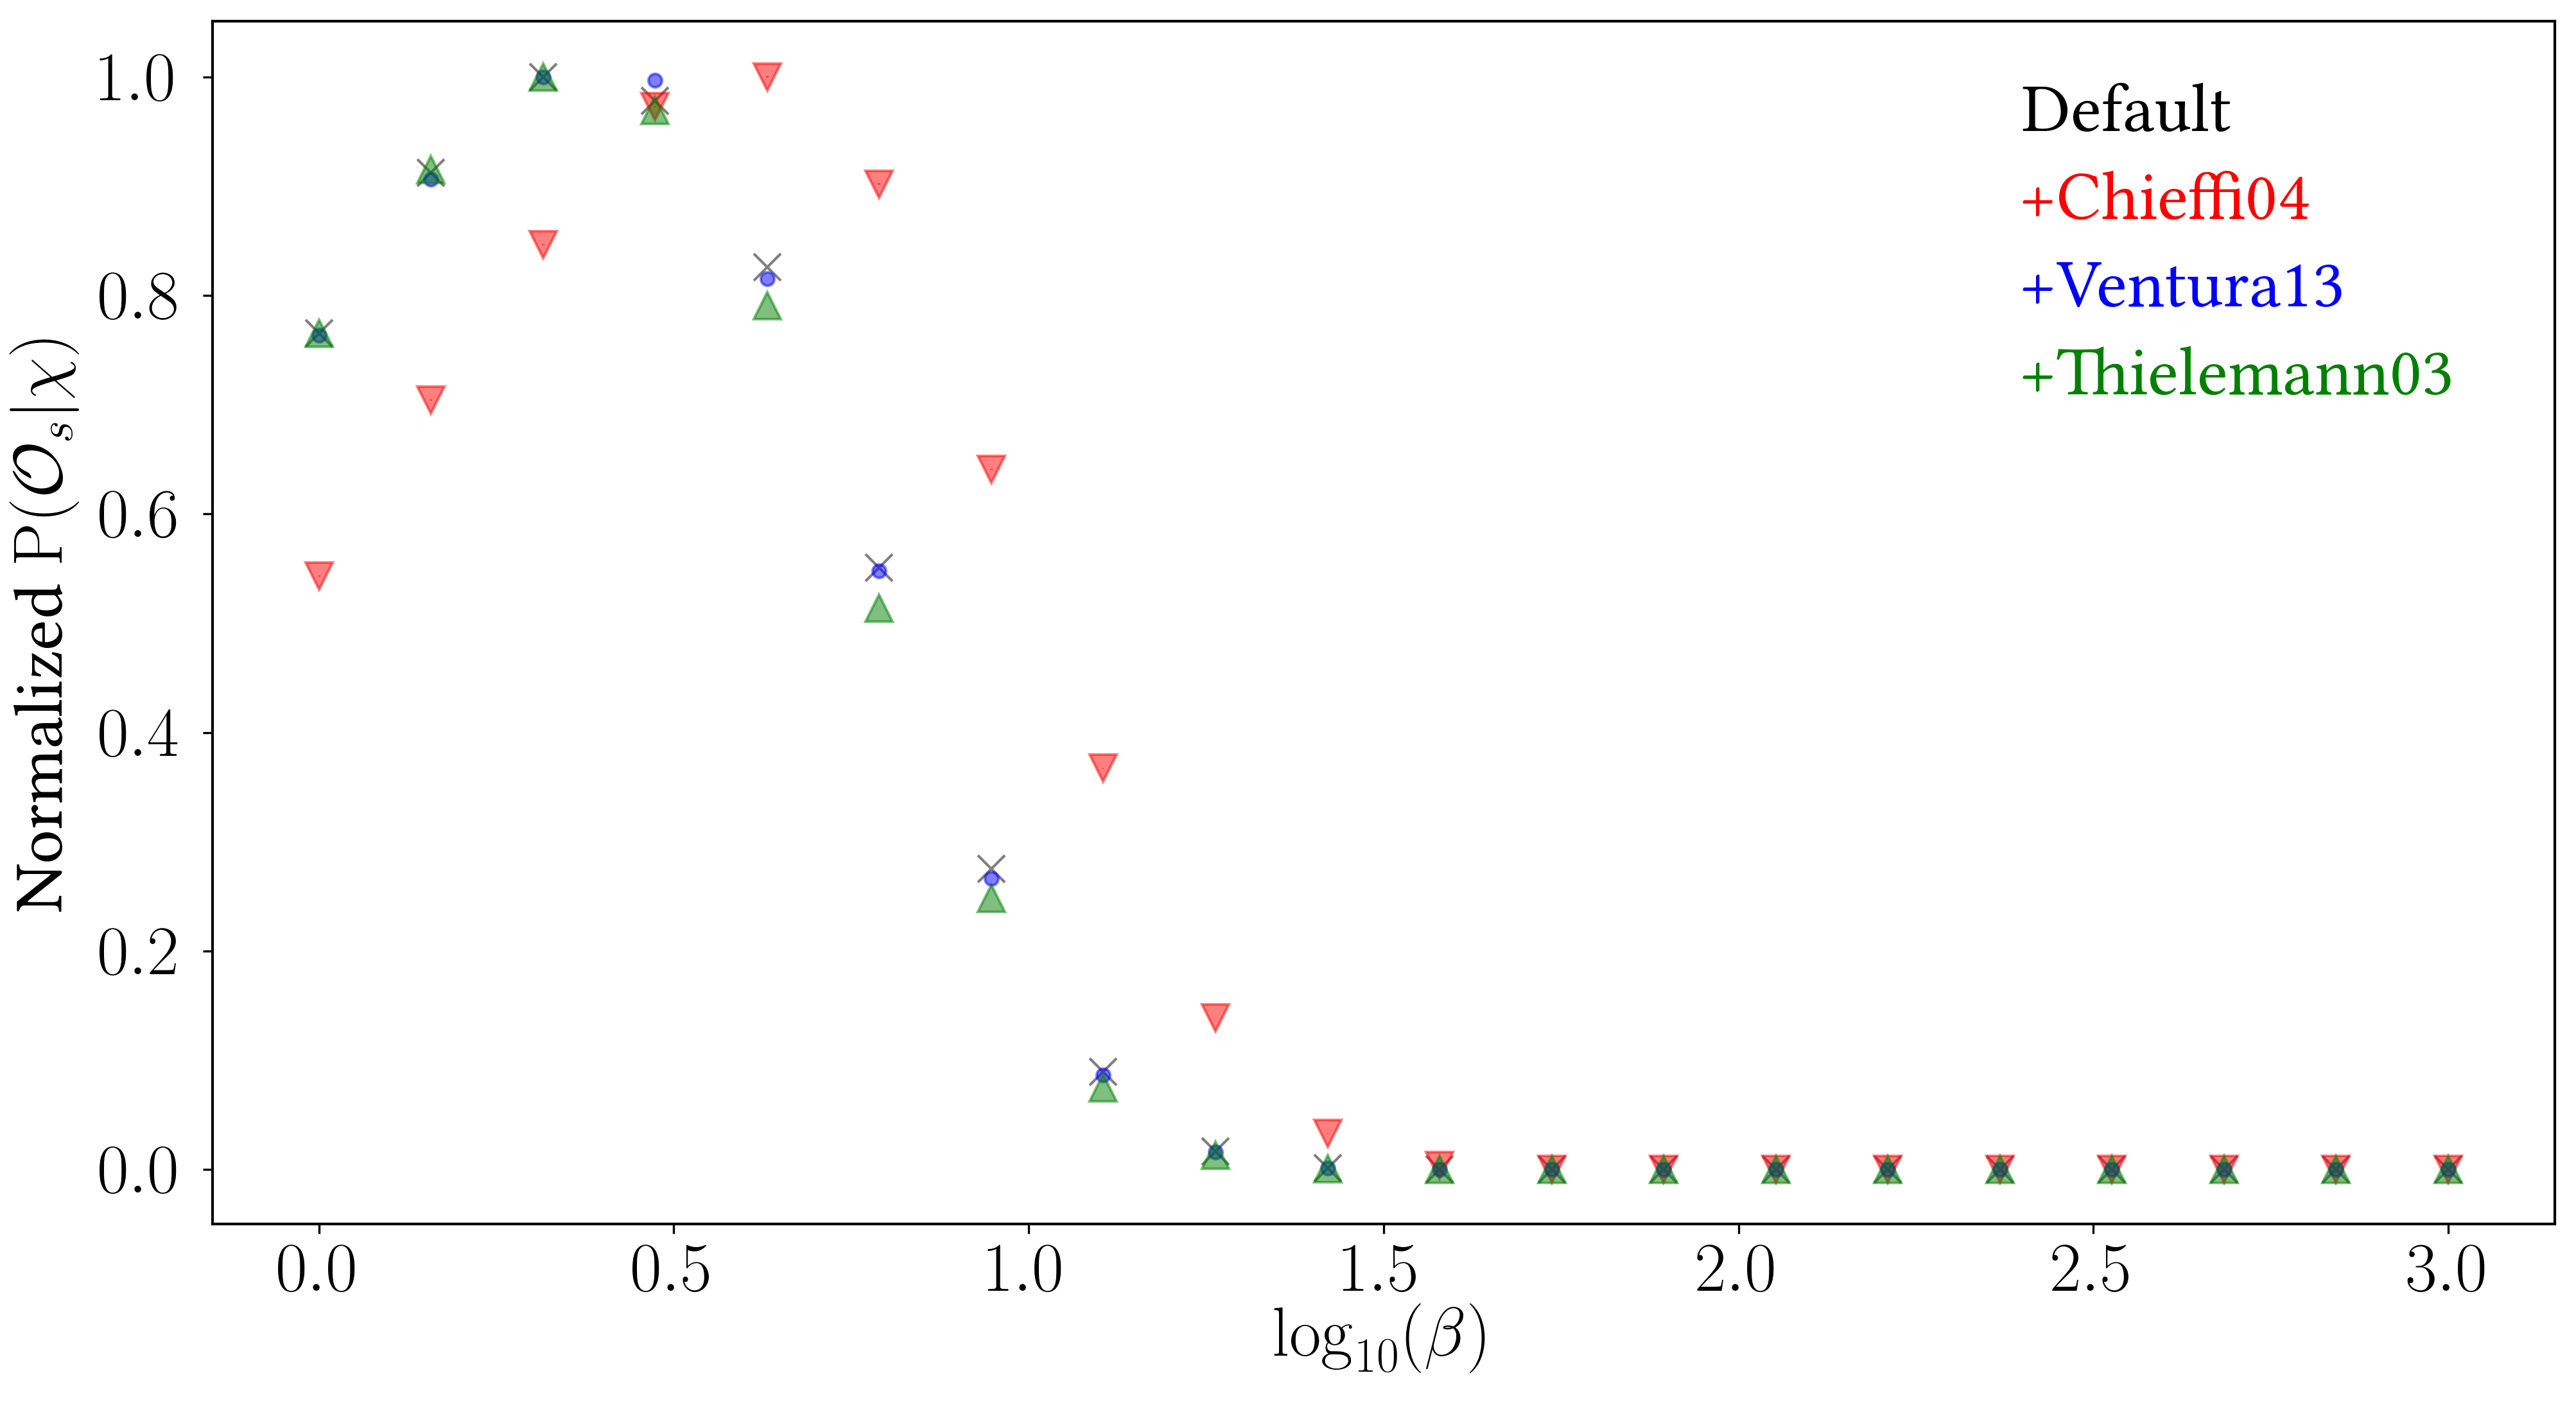

In [12]:
# Plot parameters
text_size = 26
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)
      

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),scores[i]/max(scores[i]),yerr=errors[i],fmt=shapes[i],label=names[i],ms=10,c=colors[i],alpha=0.5) 
    plt.text(2.4,0.95-0.08*i,names[i],color=colors[i])
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'Normalized $\mathrm{P}(\mathcal{O}_s|\chi)$')
#plt.legend()
plt.savefig('PaperPlots/RescaledEvidence.pdf',bbox_inches="tight")

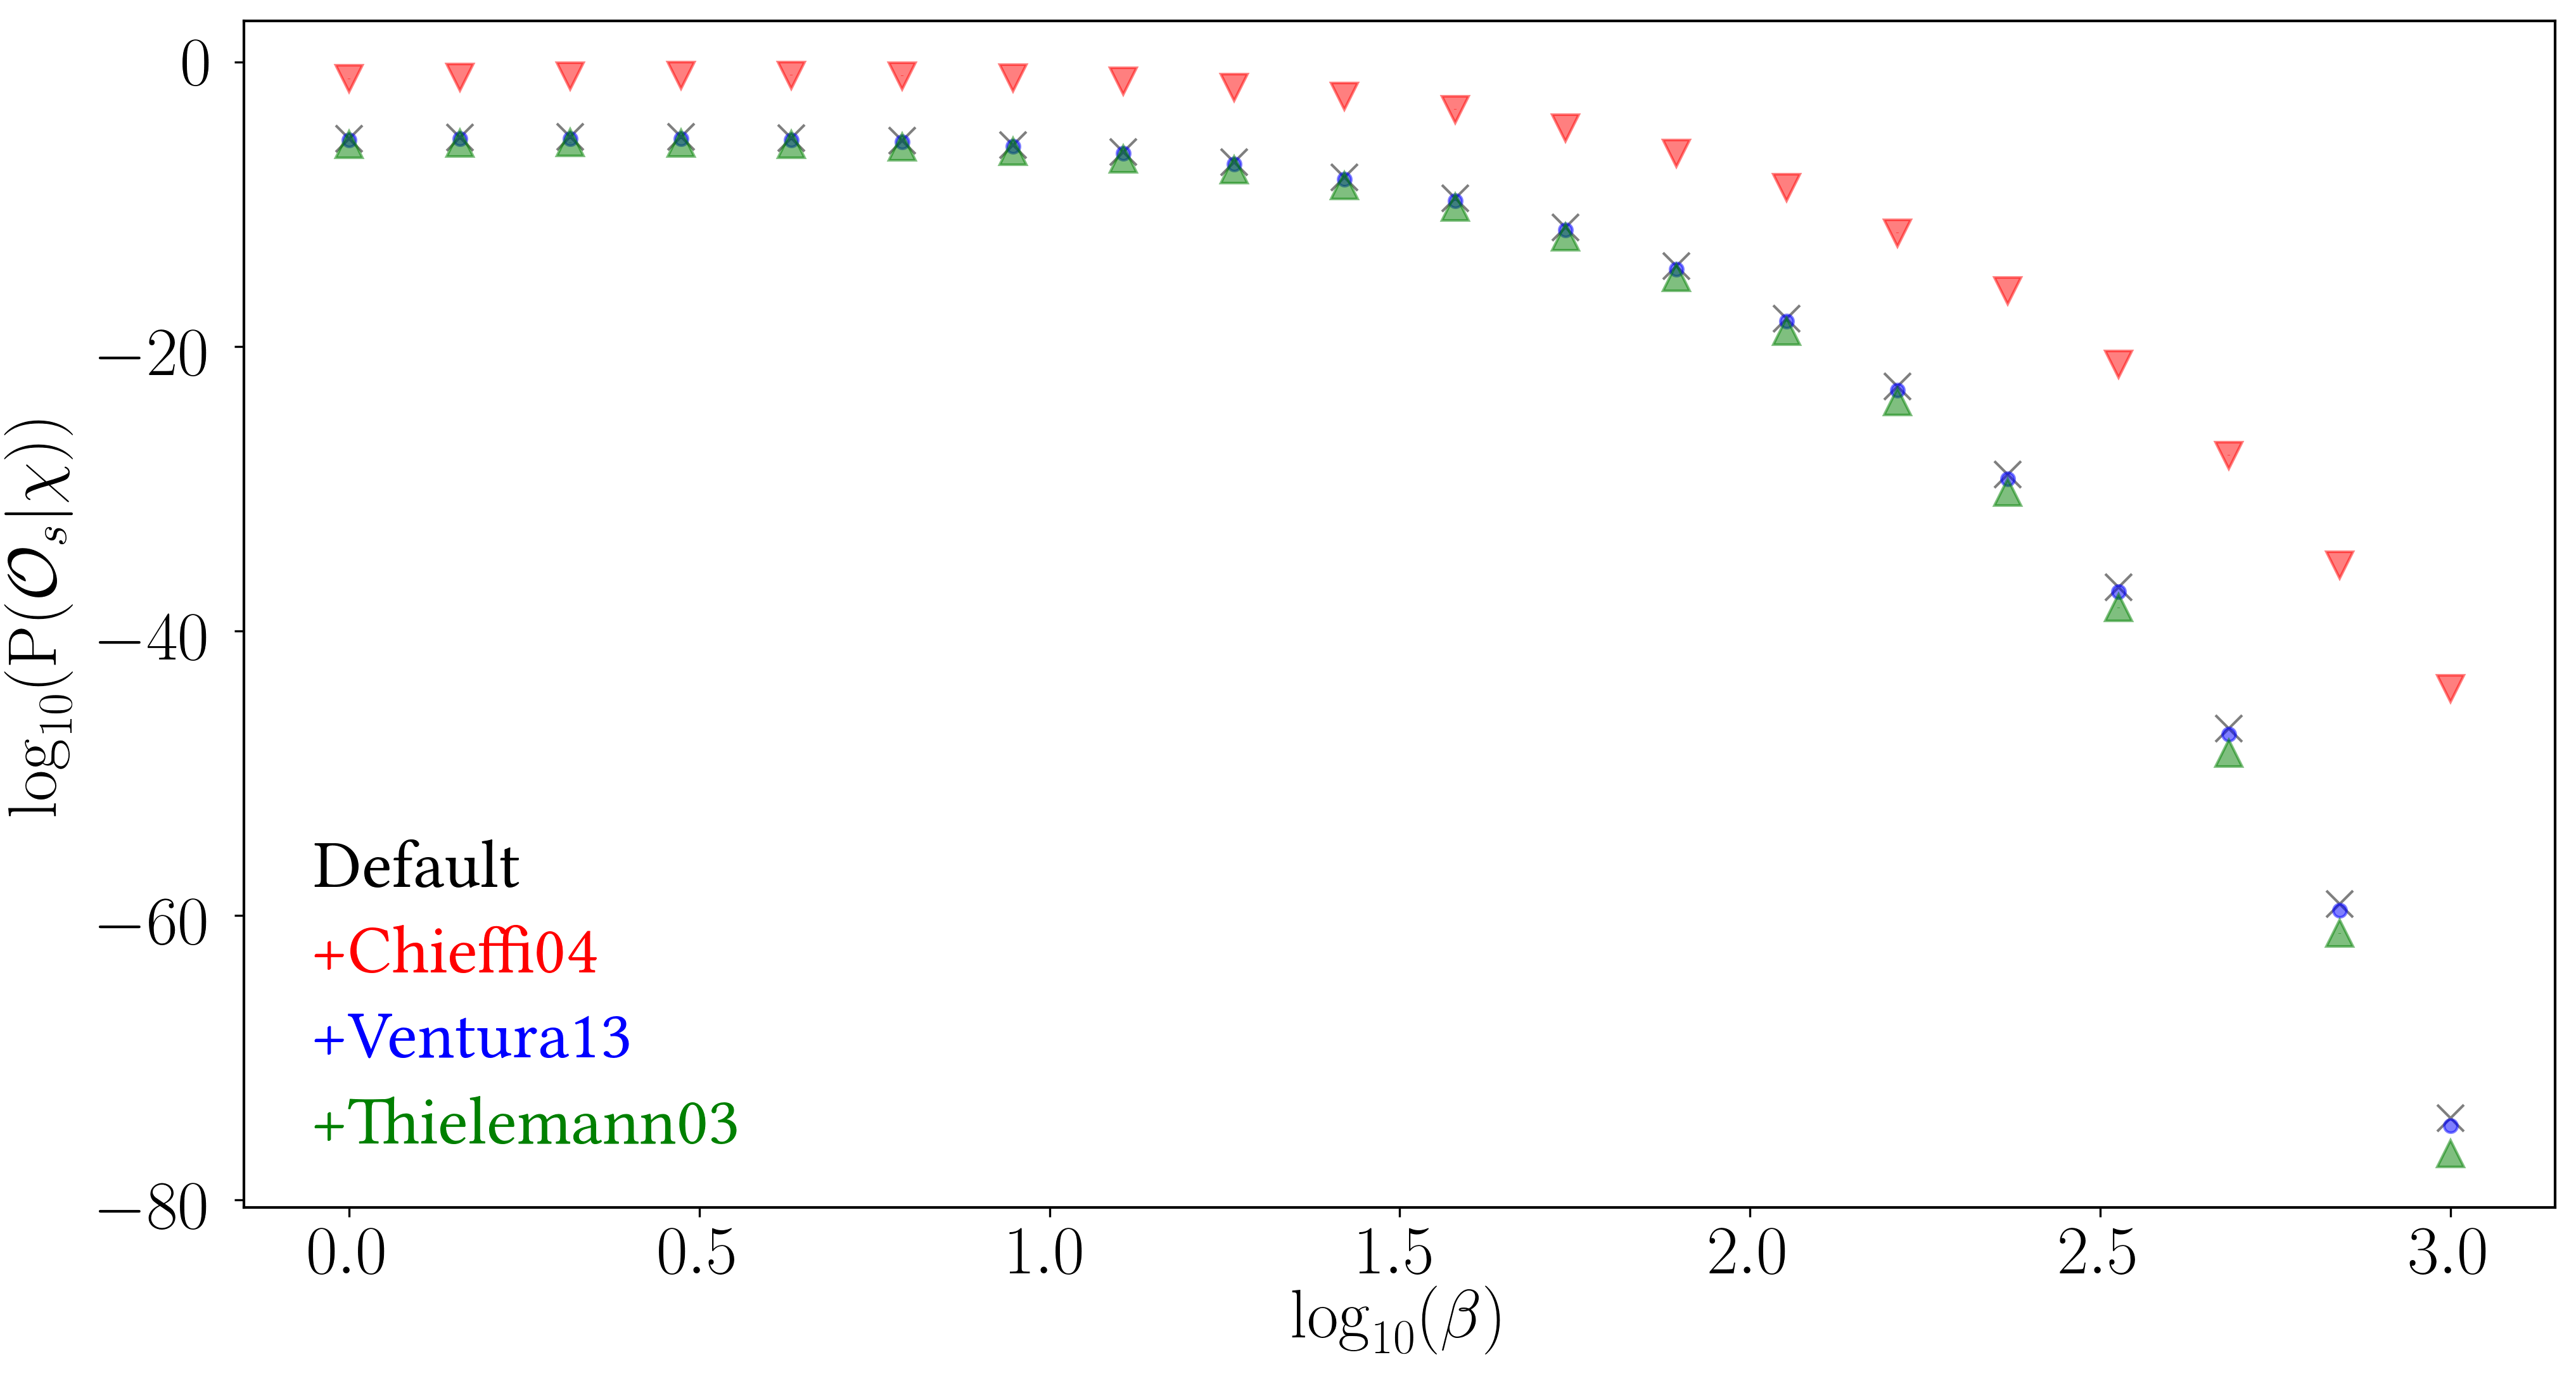

In [20]:
text_size = 26
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)

for i in [0,1,2,3]:
    log_error = errors[i]/(scores[i]*np.log(10))
    plt.errorbar(np.log10(beta_param),np.log10(scores[i]),fmt=shapes[i],yerr = log_error,label=names[i],c=colors[i],ms=10,alpha=0.5)
    plt.text(-0.05,-58-6*i,names[i],color=colors[i])
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathrm{P}(\mathcal{O}_s|\chi))$')
#plt.legend()
#plt.title('Logarithmic Bayesian evidences')
plt.savefig('PaperPlots/logEvidence.pdf',bbox_inches="tight")

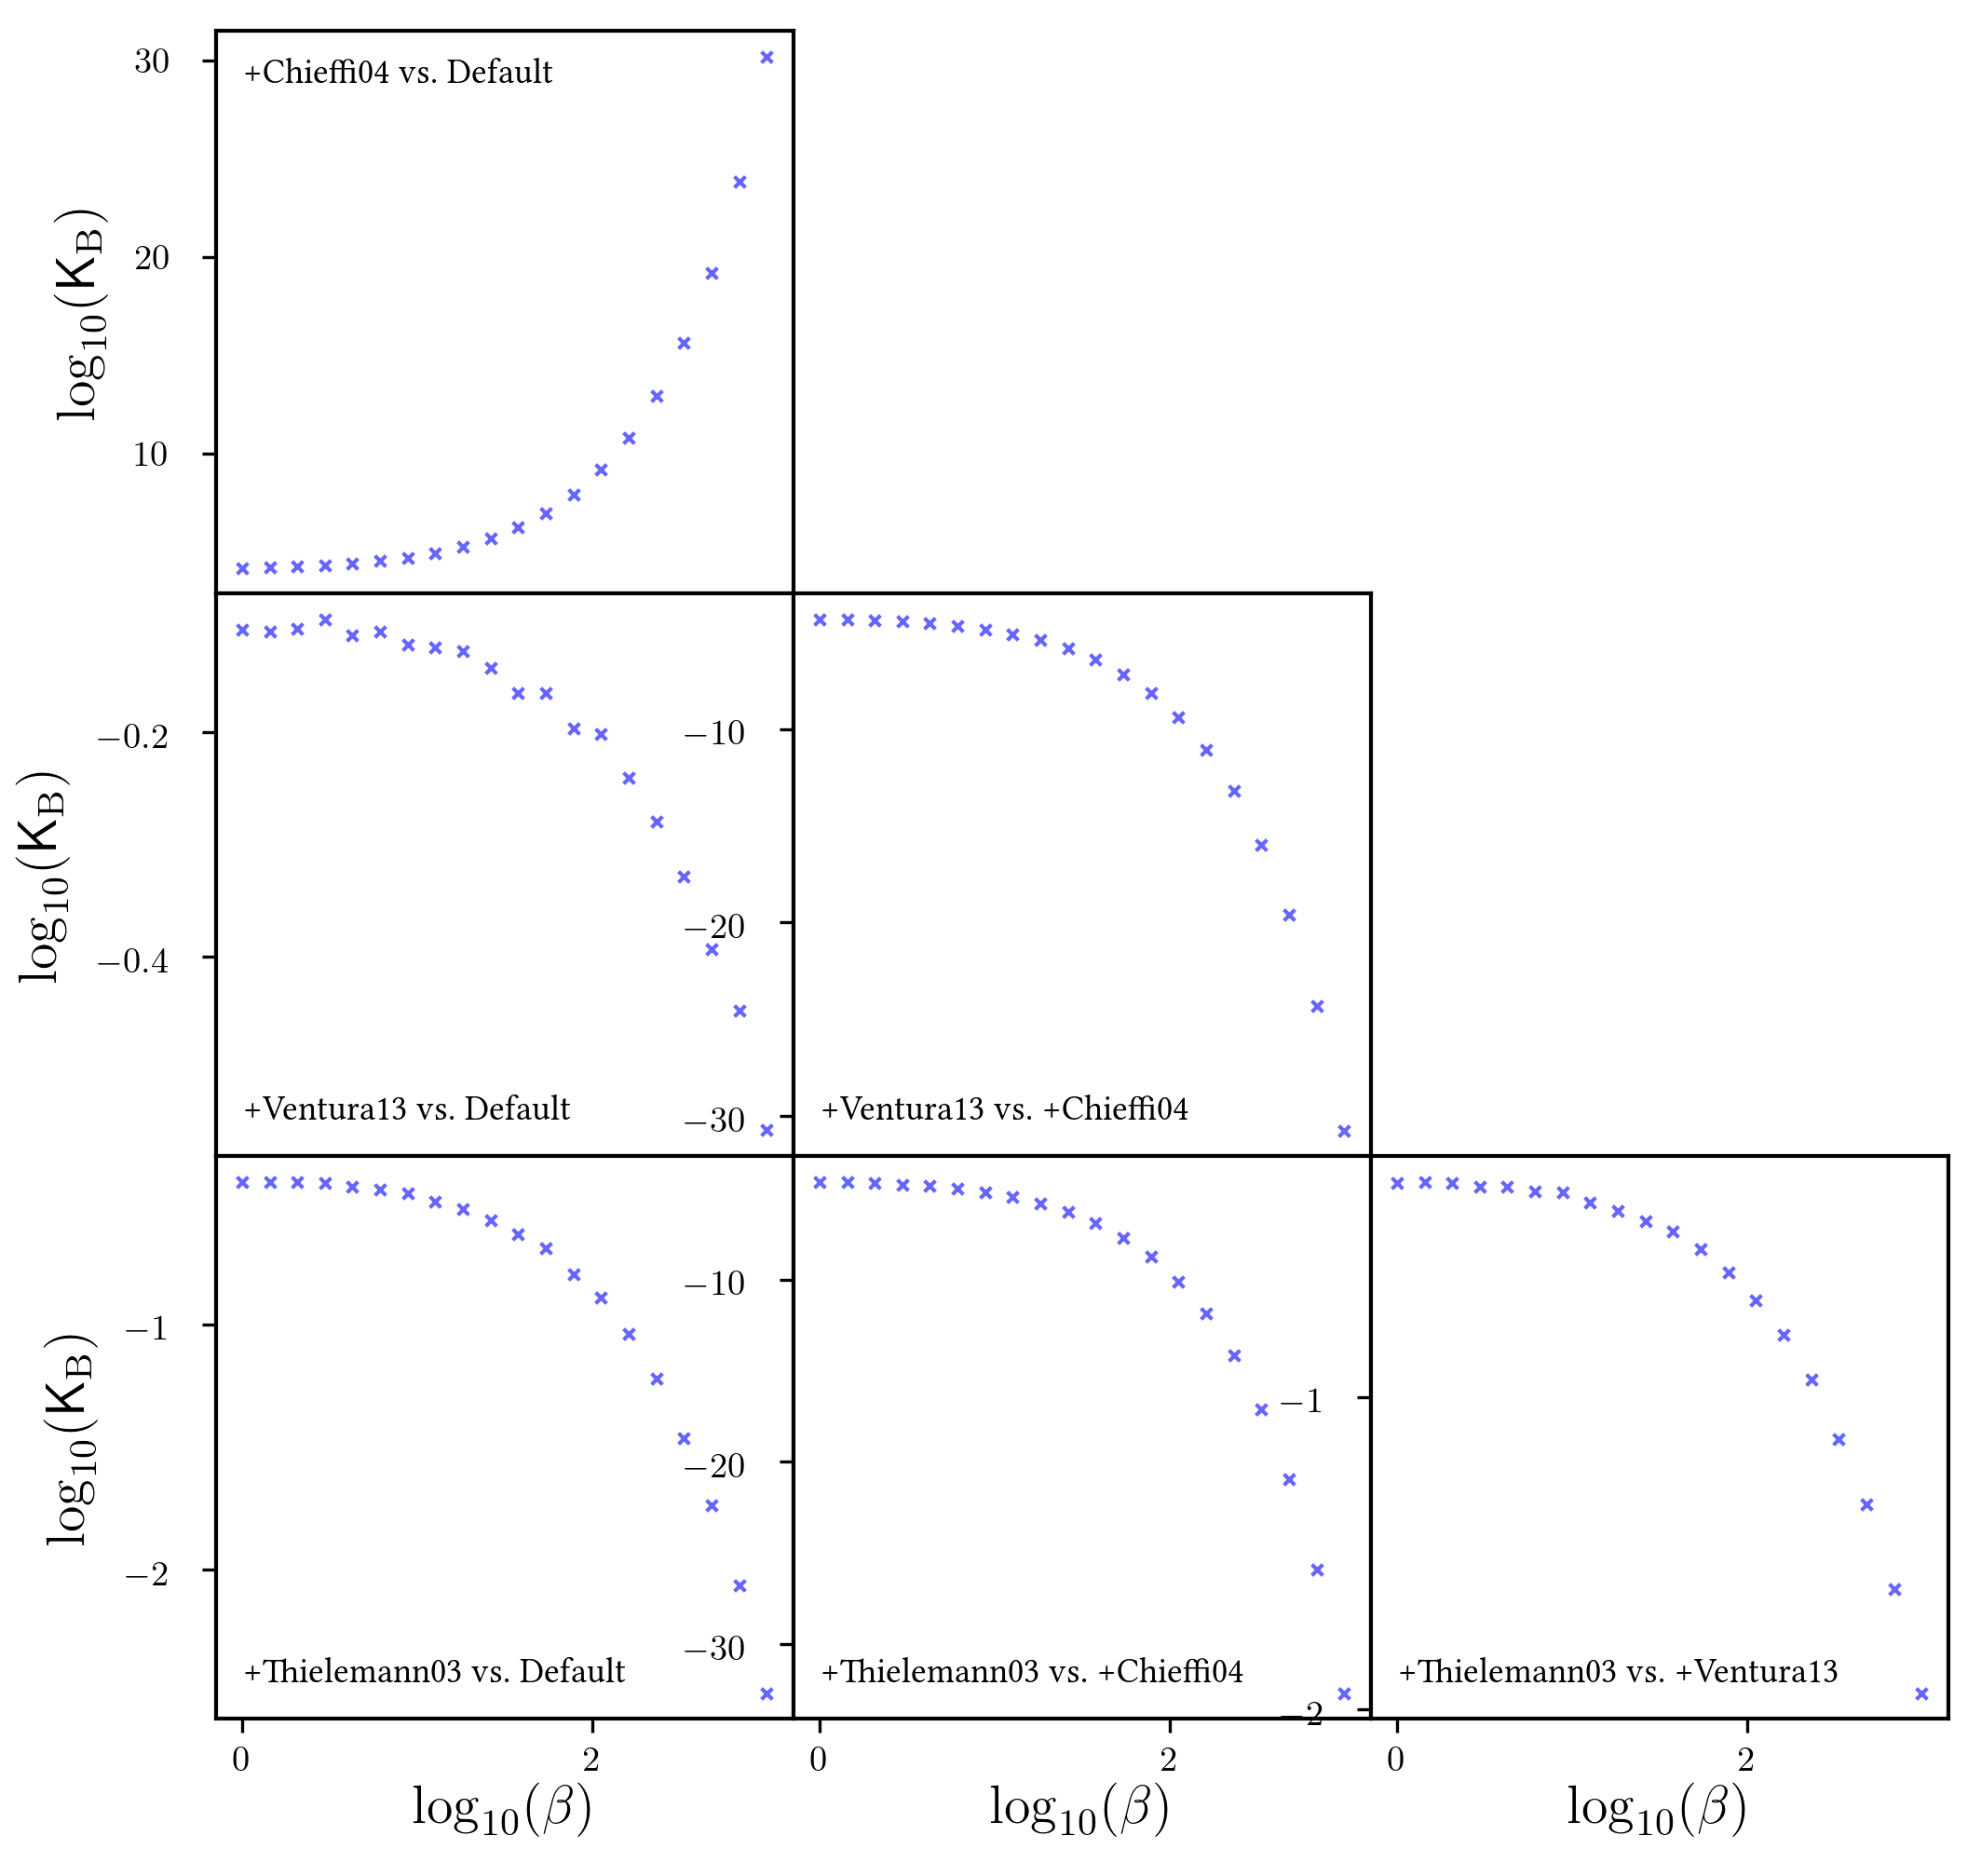

In [9]:
fig,axes = plt.subplots(nrows = 3, ncols = 3,figsize=(8.,8.),dpi=300)
text_size = 14
small_text = 9
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=small_text)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
alpha = 0.6
lw=2 # Linewidth
wspace = 0.0 # blankspace width between subplots
hspace = 0.0# blankspace height between subplots
plt.subplots_adjust(wspace=wspace,hspace=hspace)
# Create plot
for i in range(3):
    for j in range(3):
        axes[i,j].locator_params(nbins=3)
        if i>j or i==j:
            axes[i,j].scatter(np.log10(beta_param),np.log10(scores[i+1]/scores[j]),c='b',marker='x',alpha=alpha,s=8)
            if i == 2:
                axes[i,j].set_xlabel(r'$\log_{10}(\beta)$')
            if j == 0:
                axes[i,j].set_ylabel(r'$\log_{10}(\mathsf{K}_\mathrm{B})$')
            if i == 0 and j == 0:
                axes[i,j].text(0.05, 0.95, str(names[i+1])+' vs. '+str(names[j]),verticalalignment='top', horizontalalignment='left',transform=axes[i,j].transAxes,color='k', fontsize=small_text)
            else:
                axes[i,j].text(0.05, 0.05, str(names[i+1])+' vs. '+str(names[j]),verticalalignment='bottom', horizontalalignment='left',transform=axes[i,j].transAxes,color='k', fontsize=small_text)
        if j>i:
            axes[i,j].axis('off')
plt.show()
#fig.savefig('PaperPlots/BayesComparison.pdf')


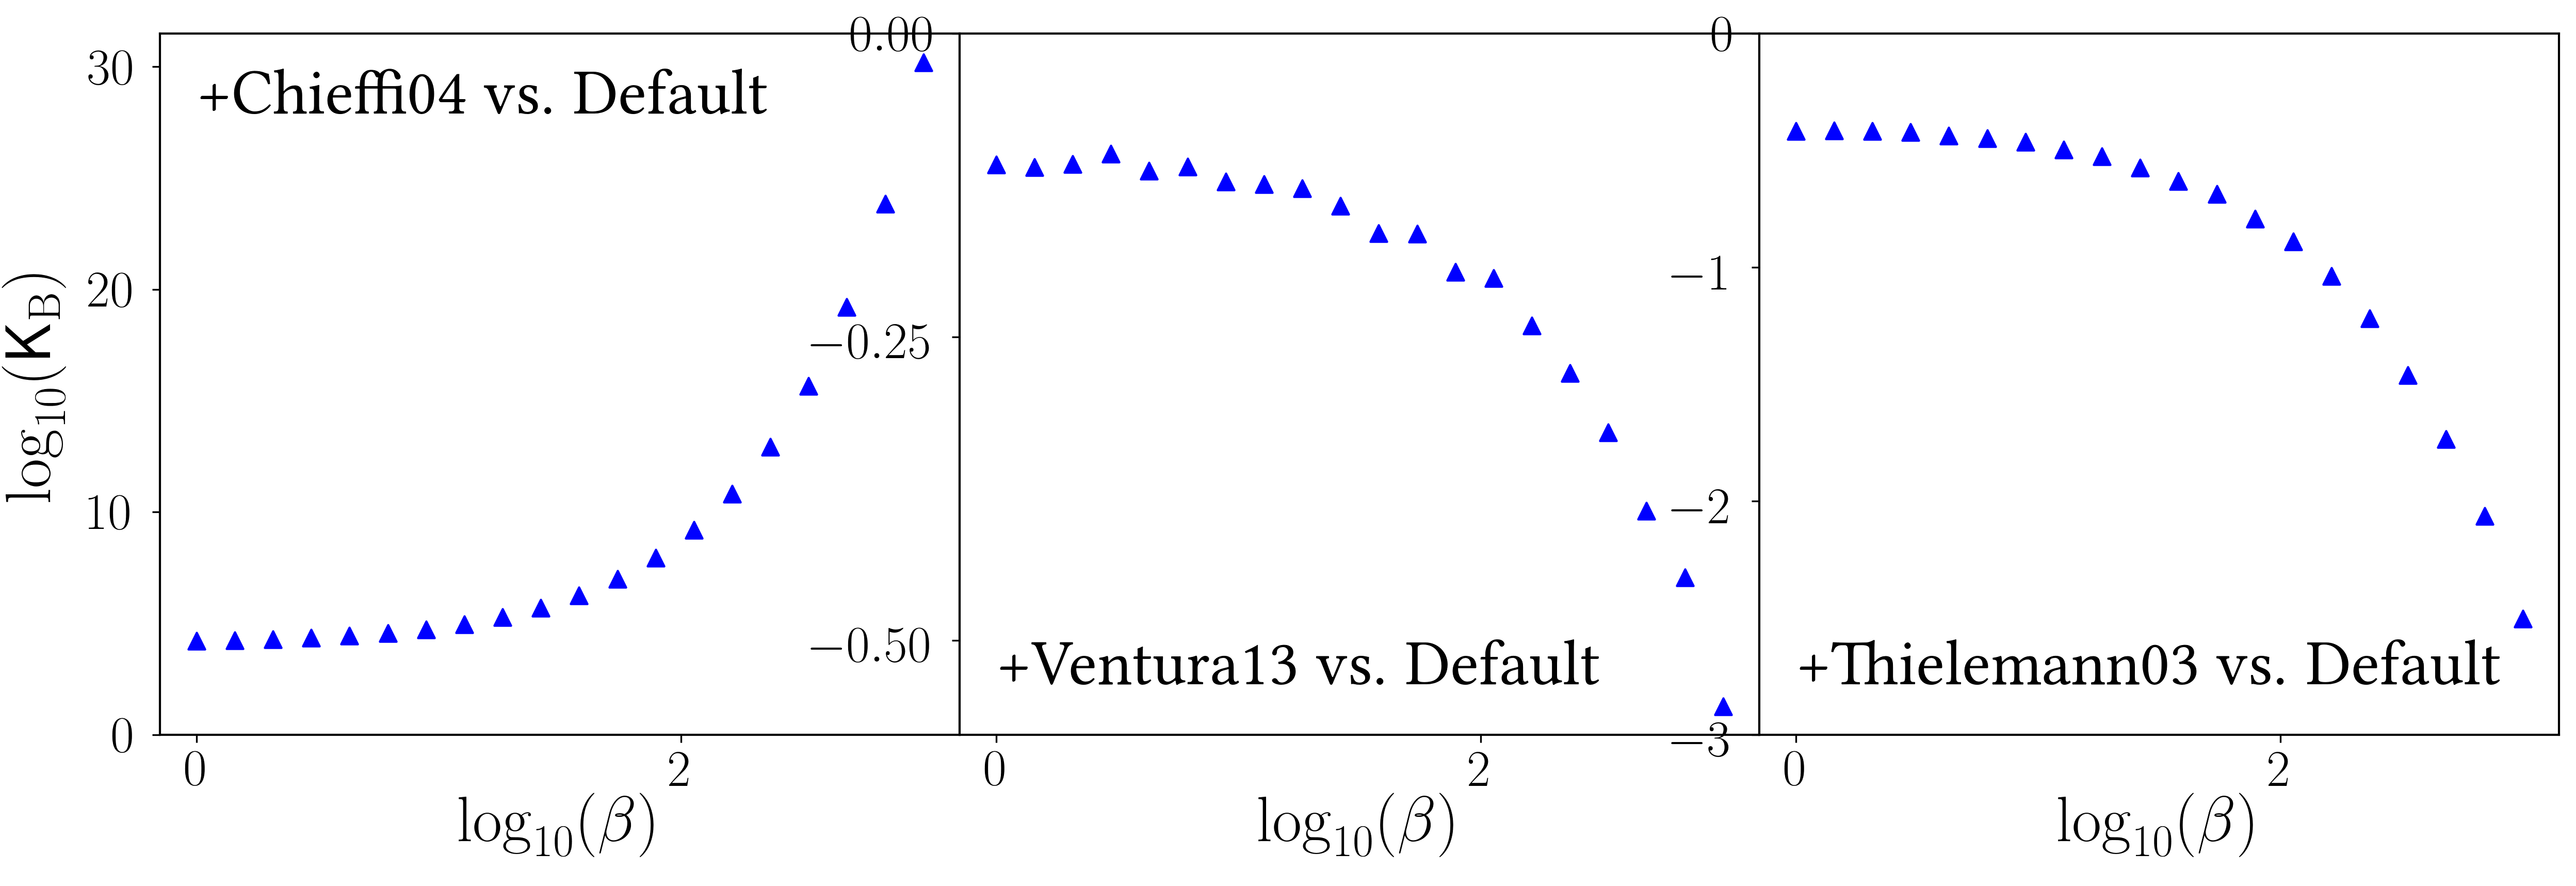

In [43]:
fig,axes = plt.subplots(nrows = 1, ncols = 3,figsize=(20.,6.),dpi=300)
text_size = 30
small_text = 30
axis_text = 24
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=axis_text)
plt.rc('ytick', labelsize=axis_text)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
alpha = 0.6
lw=2 # Linewidth
wspace = 0.0 # blankspace width between subplots
hspace = 0.0# blankspace height between subplots
plt.subplots_adjust(wspace=wspace,hspace=hspace)
# Create plot

for i in range(3):
    axes[i].locator_params(nbins=3)
    axes[i].scatter(np.log10(beta_param),np.log10(scores[i+1]/scores[0]),c='b',marker='^',s=60)
    axes[i].set_xlabel(r'$\log_{10}(\beta)$')
    if i == 0:
        axes[i].set_ylabel(r'$\log_{10}(\mathsf{K}_\mathrm{B})$')
    if i == 0:
        axes[i].text(0.05, 0.95, str(names[i+1])+' vs. '+str(names[0]),verticalalignment='top', horizontalalignment='left',transform=axes[i].transAxes,color='k', fontsize=small_text)
    else:
        axes[i].text(0.05, 0.05, str(names[i+1])+' vs. '+str(names[0]),verticalalignment='bottom', horizontalalignment='left',transform=axes[i].transAxes,color='k', fontsize=small_text)
    
axes[0].set_yticks([0,10,20,30])
axes[1].set_yticks([-0.5,-0.25,0.])
axes[2].set_yticks([-3,-2,-1,0])
plt.show()
#fig.savefig('PaperPlots/BayesComparison.pdf')


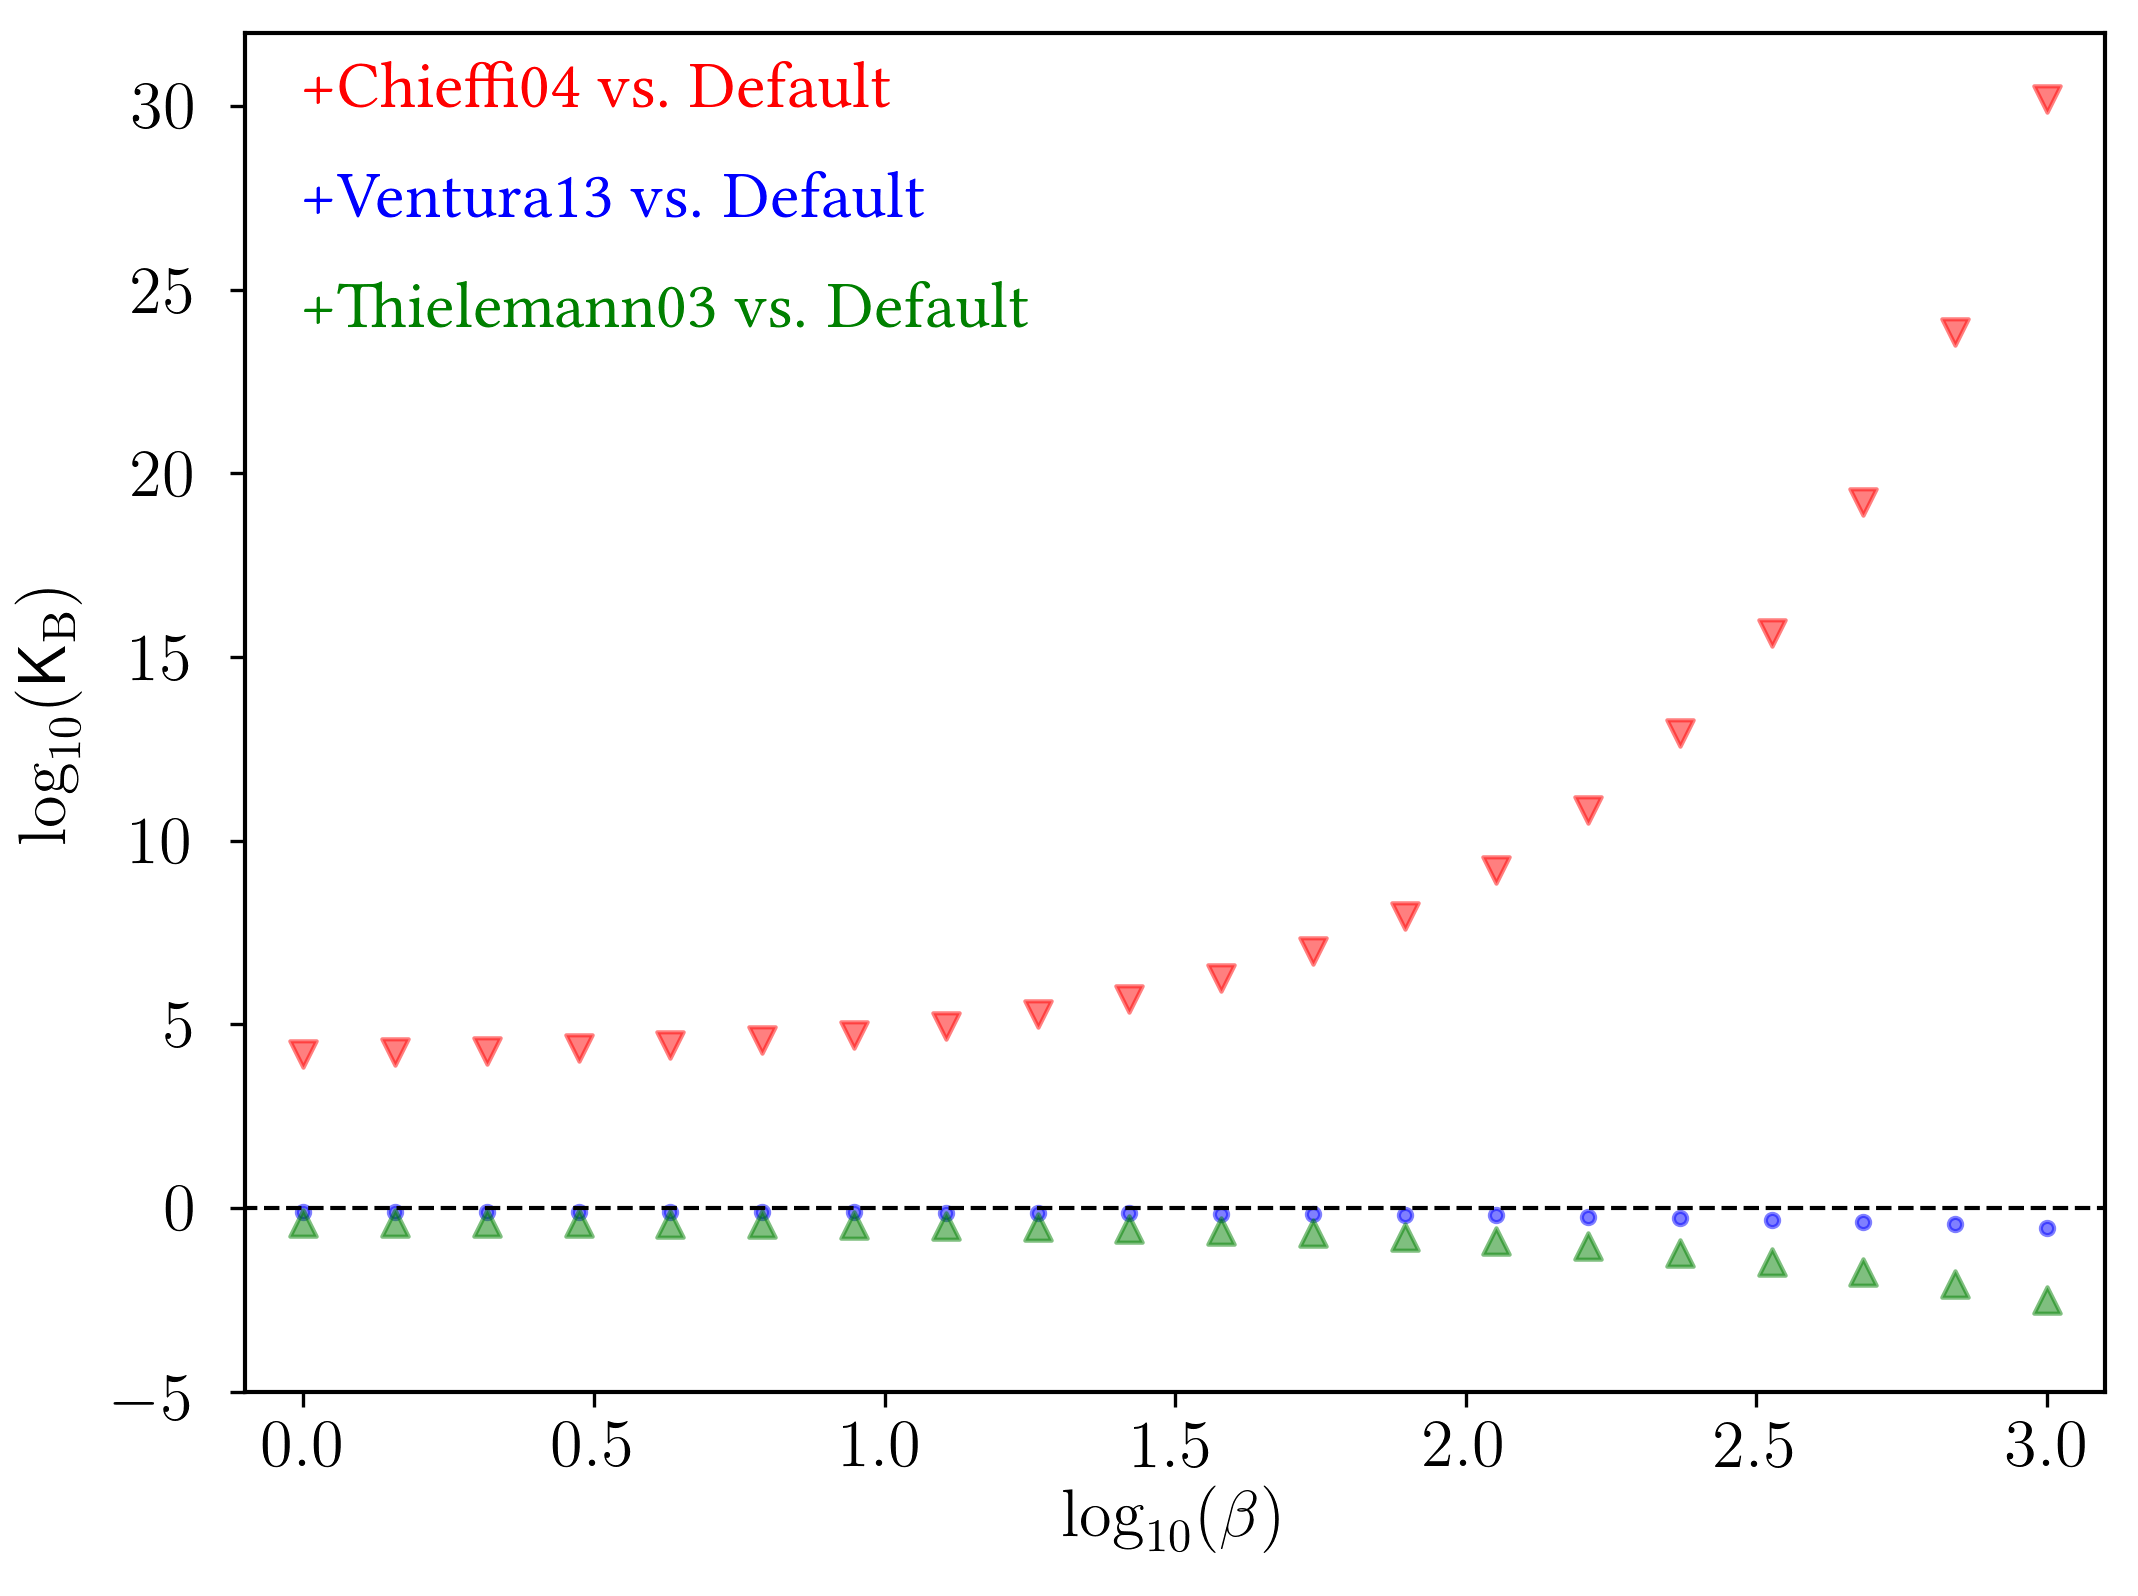

In [23]:
fig = plt.figure(figsize=(8.,6.),dpi=300)

text_size = 16
small_text = 20
axis_text = 16
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=axis_text)
plt.rc('ytick', labelsize=axis_text)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
w=2 # Linewidth
labels = [str(item)+" vs. "+str(names[0]) for item in names[1:]]
colors = ['r','b','g']
shapes = ['v','.','^']
# Create plot
for i in range(3):
    plt.scatter(np.log10(beta_param),np.log10(scores[i+1]/scores[0]),c=colors[i],marker=shapes[i],s=40,label=labels[i],alpha=0.5)
    plt.text(0.0,30-3*i, labels[i],color=colors[i])
    
plt.plot(np.linspace(-1,4),np.zeros_like(np.linspace(-1,4)),'k--')
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathsf{K}_\mathrm{B})$')
plt.xlim([-0.1,3.1])
plt.ylim([-5,32])



#plt.legend()
plt.show()
fig.savefig('PaperPlots/BayesComparison.pdf',bbox_inches="tight")


## Comparison of the Hogg Scores

In [27]:
%pylab inline
# Load datasets
H_Chi = np.load('/home/philcox/Save/New_SCORES/Chieffi/Hogg_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
H_Def = np.load('/home/philcox/Save/New_SCORES/Default/Hogg_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
H_Ven = np.load('/home/philcox/Save/New_SCORES/Ventura/Hogg_score - Nomoto2013_net, Ventura, Seitenzahl.npz')
H_Thi = np.load('/home/philcox/Save/New_SCORES/Thielemann/Hogg_score - Nomoto2013_net, Karakas_net_yield, Thielemann.npz')
beta_param = H_Chi['beta_param']
scoreHC = H_Chi['score']
scoreHD = H_Def['score']
scoreHV = H_Ven['score']
scoreHT = H_Thi['score']
H_Chi.close()
H_Def.close()
H_Ven.close()
H_Thi.close()

Populating the interactive namespace from numpy and matplotlib


/home/philcox/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
scores2 = [scoreHD,scoreHC,scoreHV,scoreHT]
names = ['Default','+Chieffi04','+Ventura13', '+Thielemann03']
shapes = ['x','v','.','^']
colors = ['k','r','b','g']

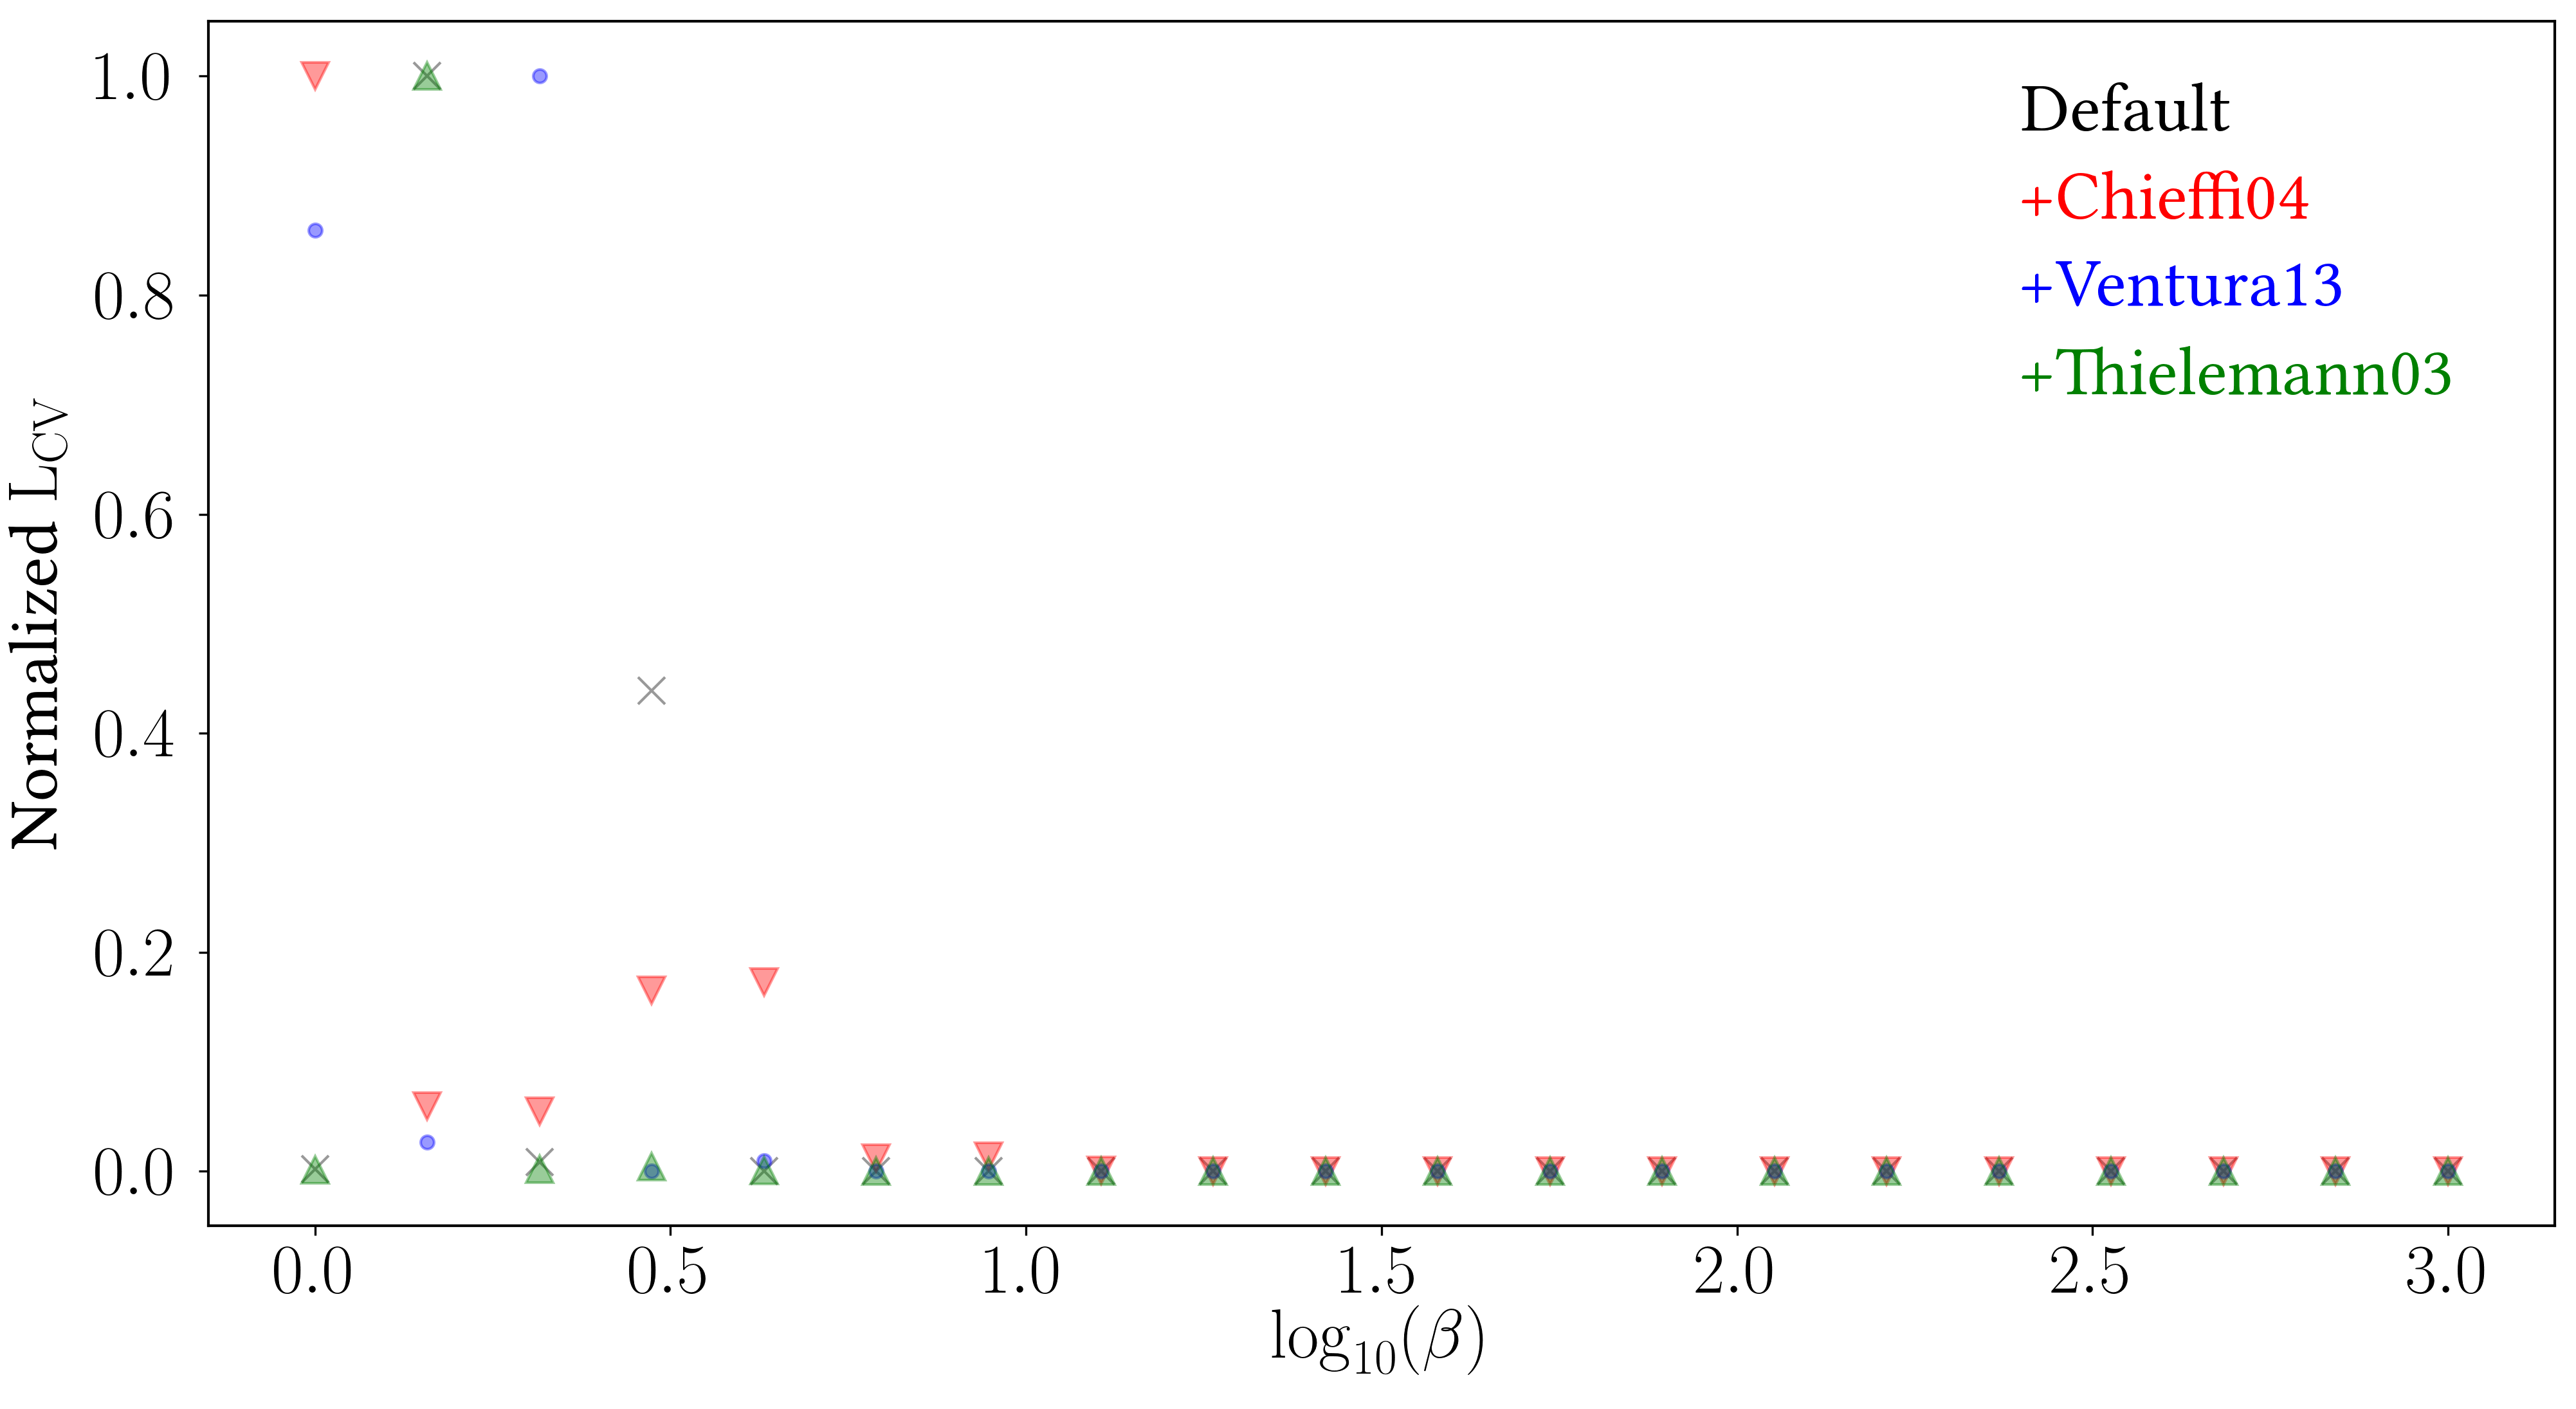

In [50]:
# Plot parameters
text_size = 26
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)
      

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),scores2[i]/max(scores2[i]),fmt=shapes[i],label=names[i],ms=10,c=colors[i],alpha=0.4) 
    plt.text(2.4,0.95-0.08*i,names[i],color=colors[i])
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'Normalized $\mathrm{L}_\mathrm{CV}$')
#plt.title('Rescaled LOO-CV score')
#plt.legend()
plt.savefig('PaperPlots/RescaledHogg.pdf',bbox_inches="tight")

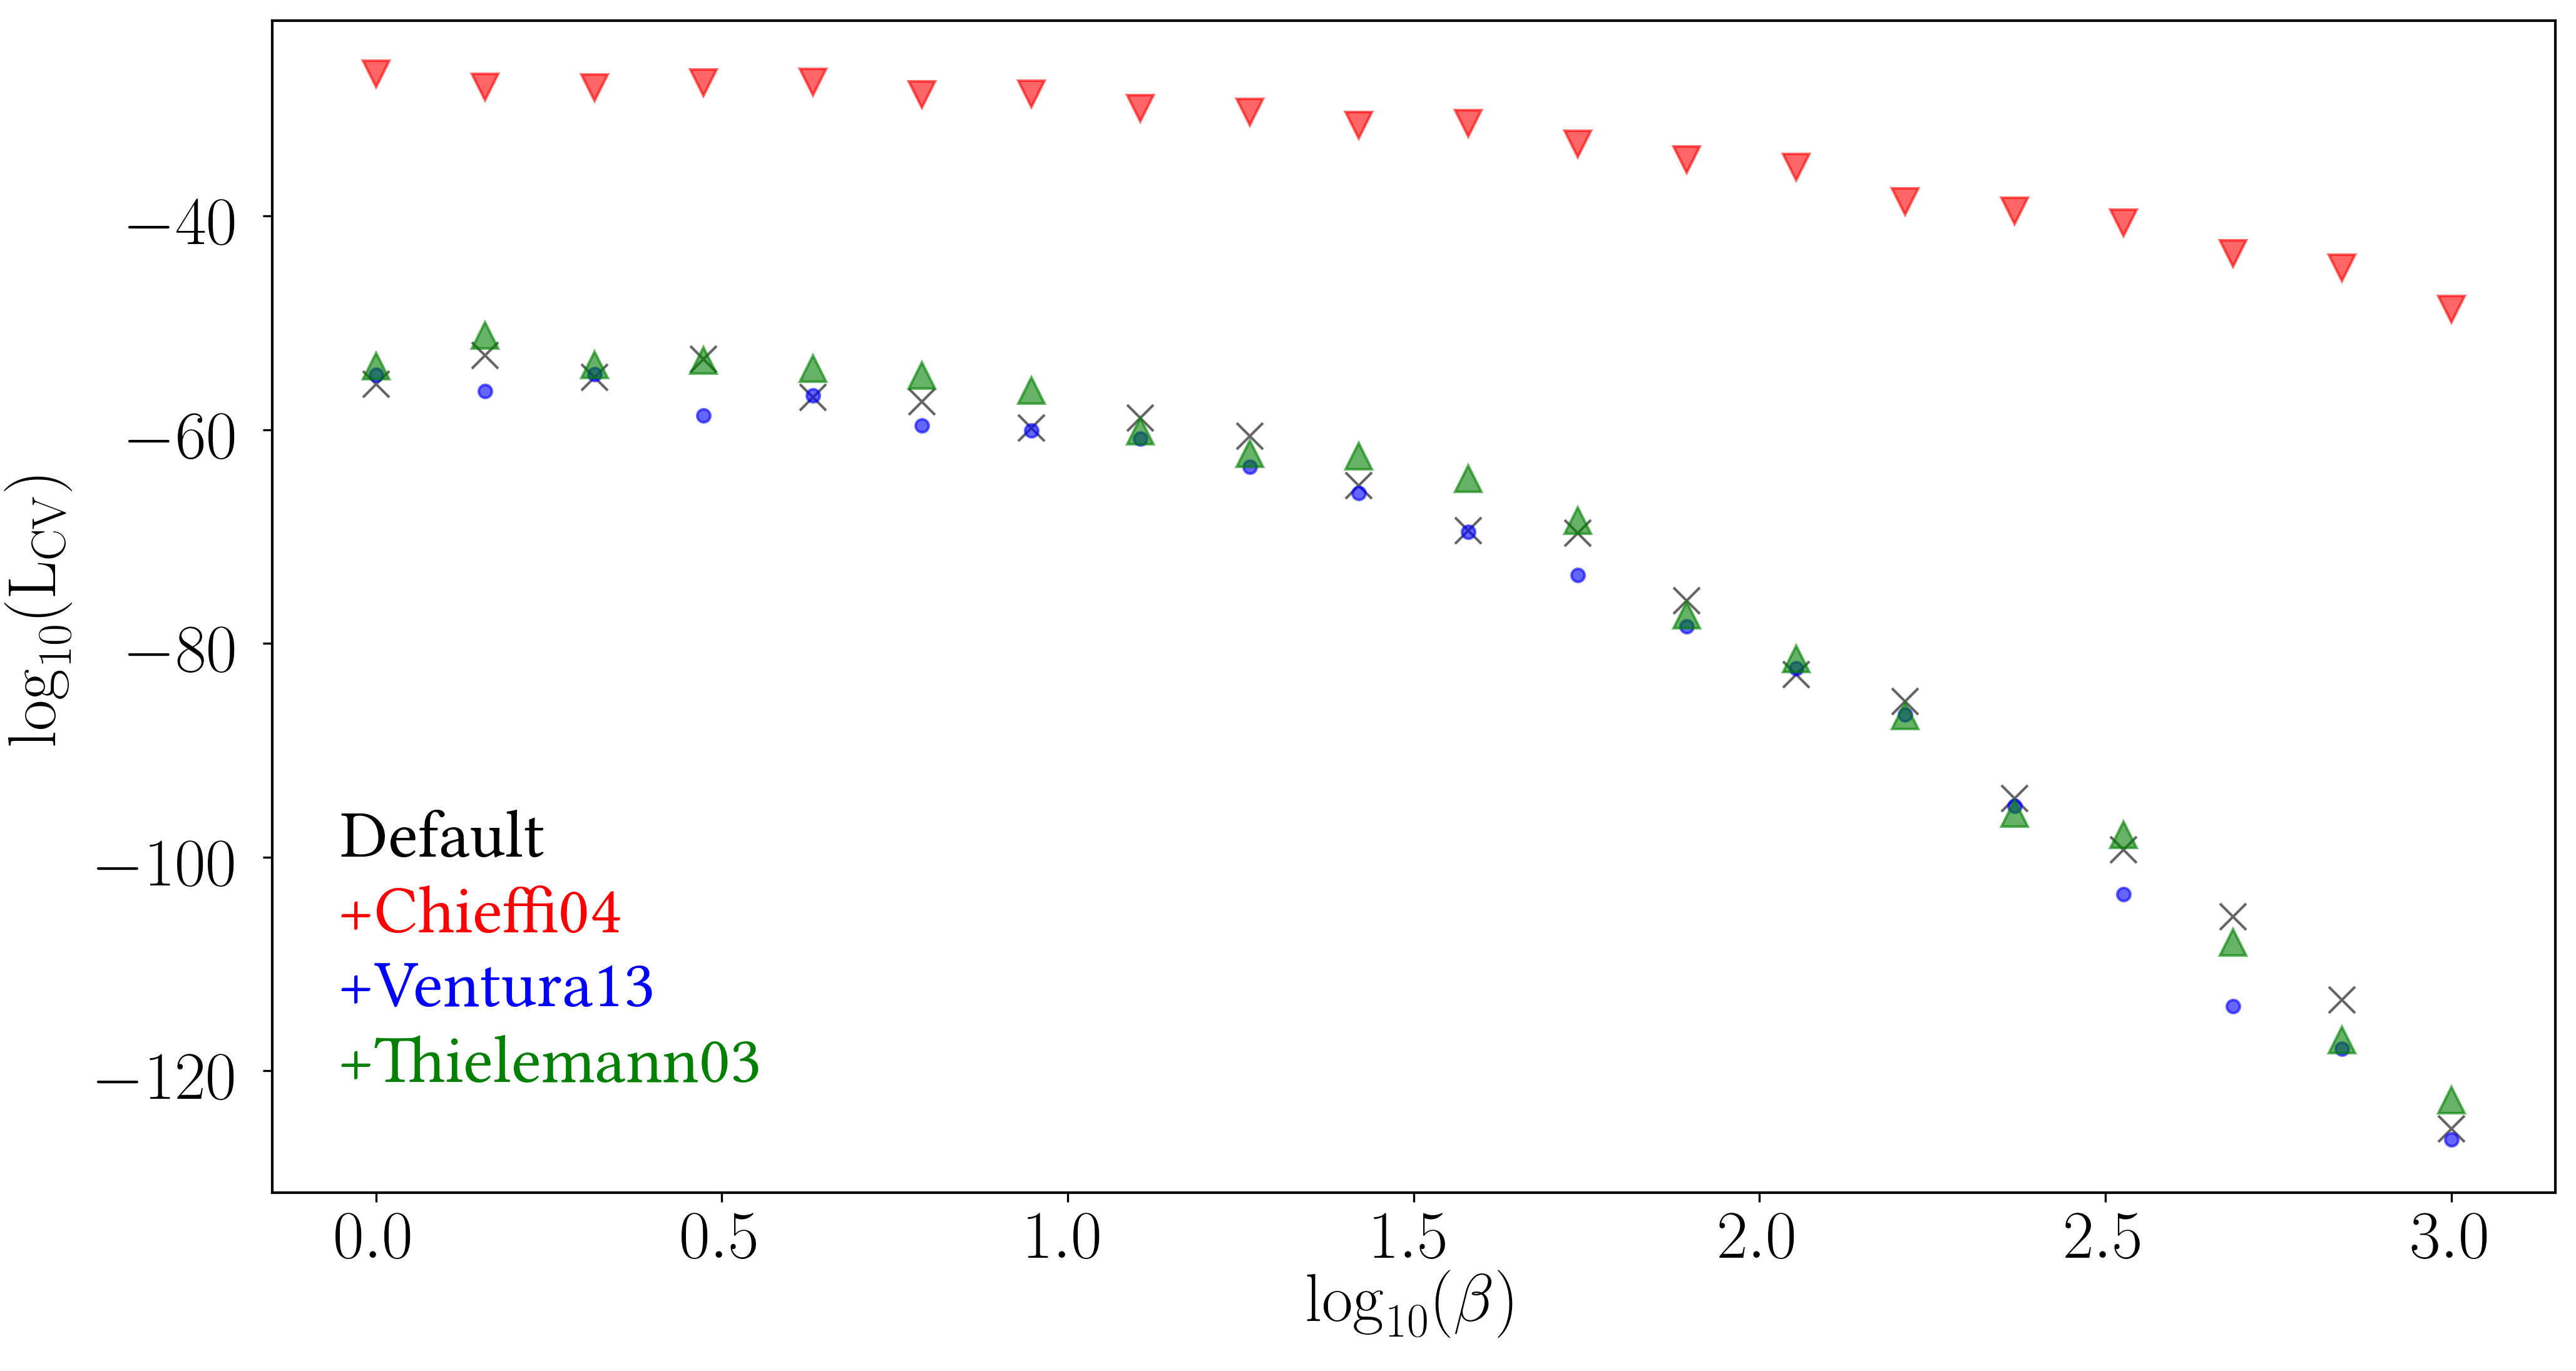

In [55]:
text_size = 26
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),np.log10(scores2[i]),fmt=shapes[i],label=names[i],c=colors[i],ms=10,alpha=0.6) 
    plt.text(-0.05,-100-7*i,names[i],color=colors[i])
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathrm{L}_\mathrm{CV})$')
#plt.legend()
#plt.title('Logarithmic LOO-CV scores')
plt.savefig('PaperPlots/logHogg.pdf',bbox_inches="tight")

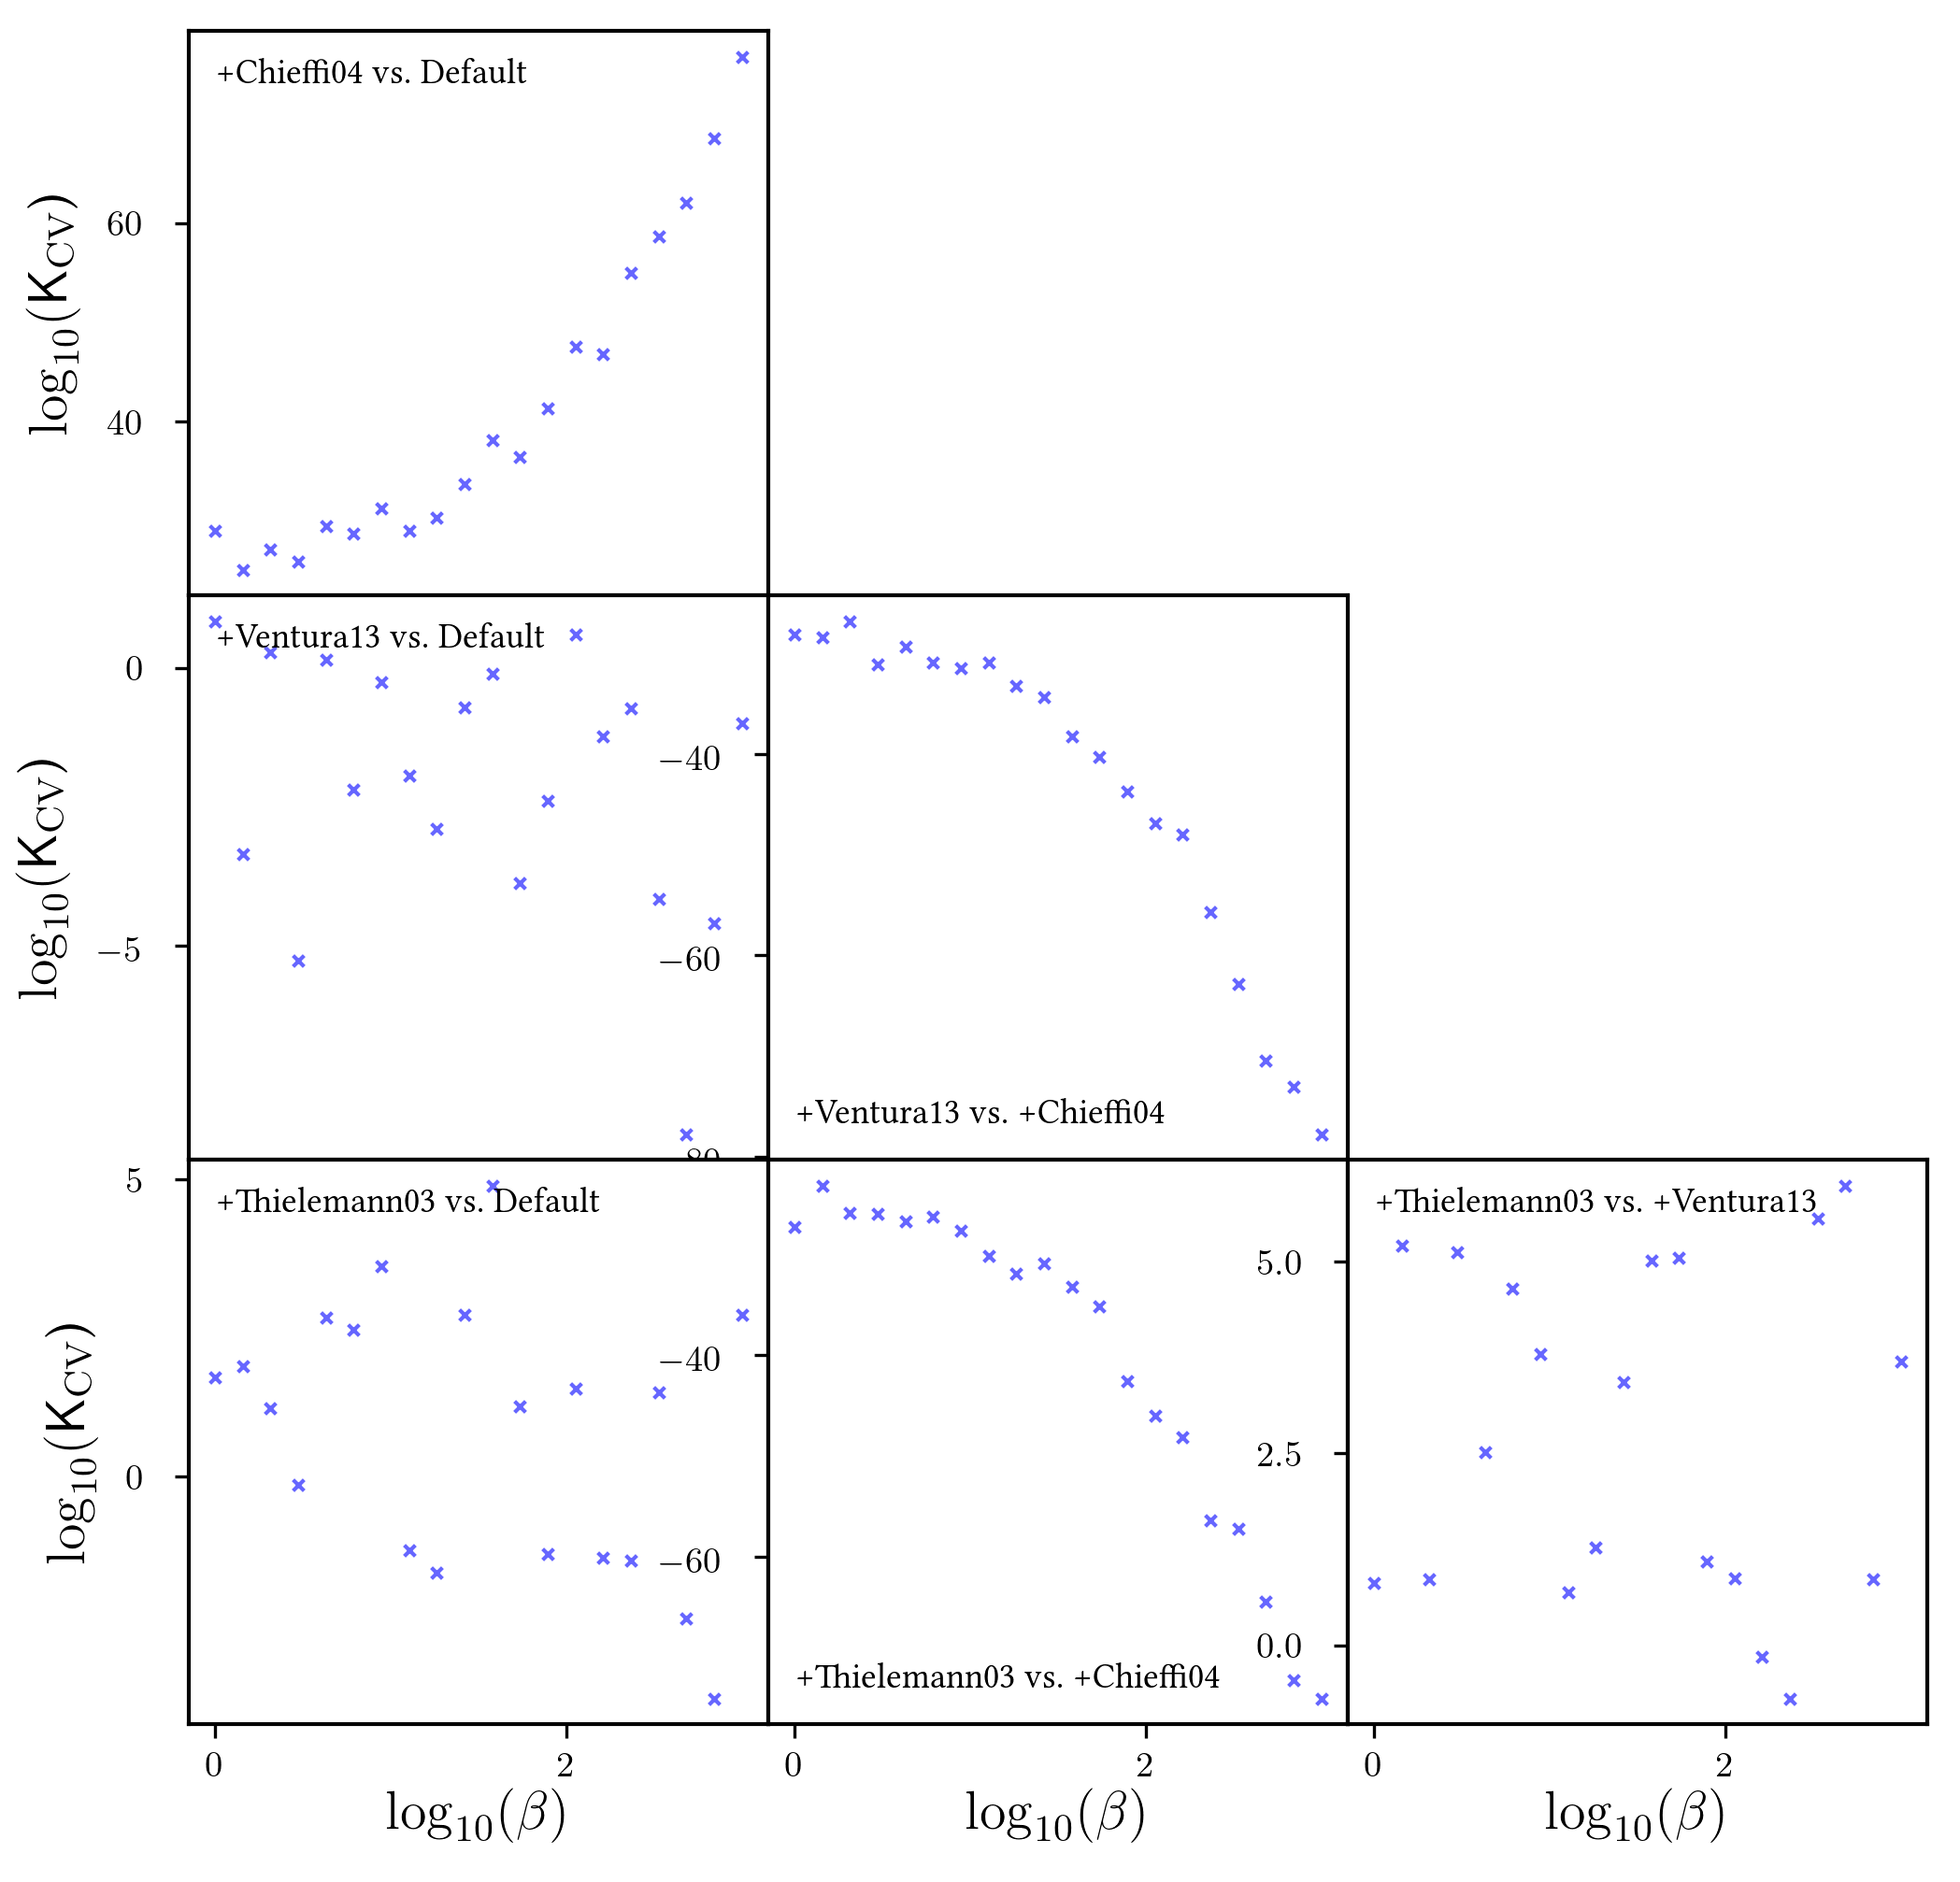

In [11]:
fig,axes = plt.subplots(nrows = 3, ncols = 3,figsize=(8.,8.),dpi=300)
text_size = 14
small_text = 9
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=small_text)
plt.rc('ytick', labelsize=small_text)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
alpha = 0.6
lw=2 # Linewidth
wspace = 0.0 # blankspace width between subplots
hspace = 0.0# blankspace height between subplots
plt.subplots_adjust(wspace=wspace,hspace=hspace)
# Create plot
for i in range(3):
    for j in range(3):
        axes[i,j].locator_params(nbins=3)
        if i>j or i==j:
            axes[i,j].scatter(np.log10(beta_param),np.log10(scores2[i+1]/scores2[j]),c='b',marker='x',alpha=alpha,s=8)
            if i == 2:
                axes[i,j].set_xlabel(r'$\log_{10}(\beta)$')
            if j == 0:
                axes[i,j].set_ylabel(r'$\log_{10}(\mathsf{K}_\mathrm{CV}$)')
            if i == 0 and j == 0 or i == 2 and j == 0 or i == 1 and j == 0 or i == 2 and j ==2:
                axes[i,j].text(0.05, 0.95, str(names[i+1])+' vs. '+str(names[j]),verticalalignment='top', horizontalalignment='left',transform=axes[i,j].transAxes,color='k', fontsize=small_text)
            else:
                axes[i,j].text(0.05, 0.05, str(names[i+1])+' vs. '+str(names[j]),verticalalignment='bottom', horizontalalignment='left',transform=axes[i,j].transAxes,color='k', fontsize=small_text)
        if j>i:
            axes[i,j].axis('off')
plt.show()
fig.savefig('PaperPlots/NewHoggComparison.pdf')


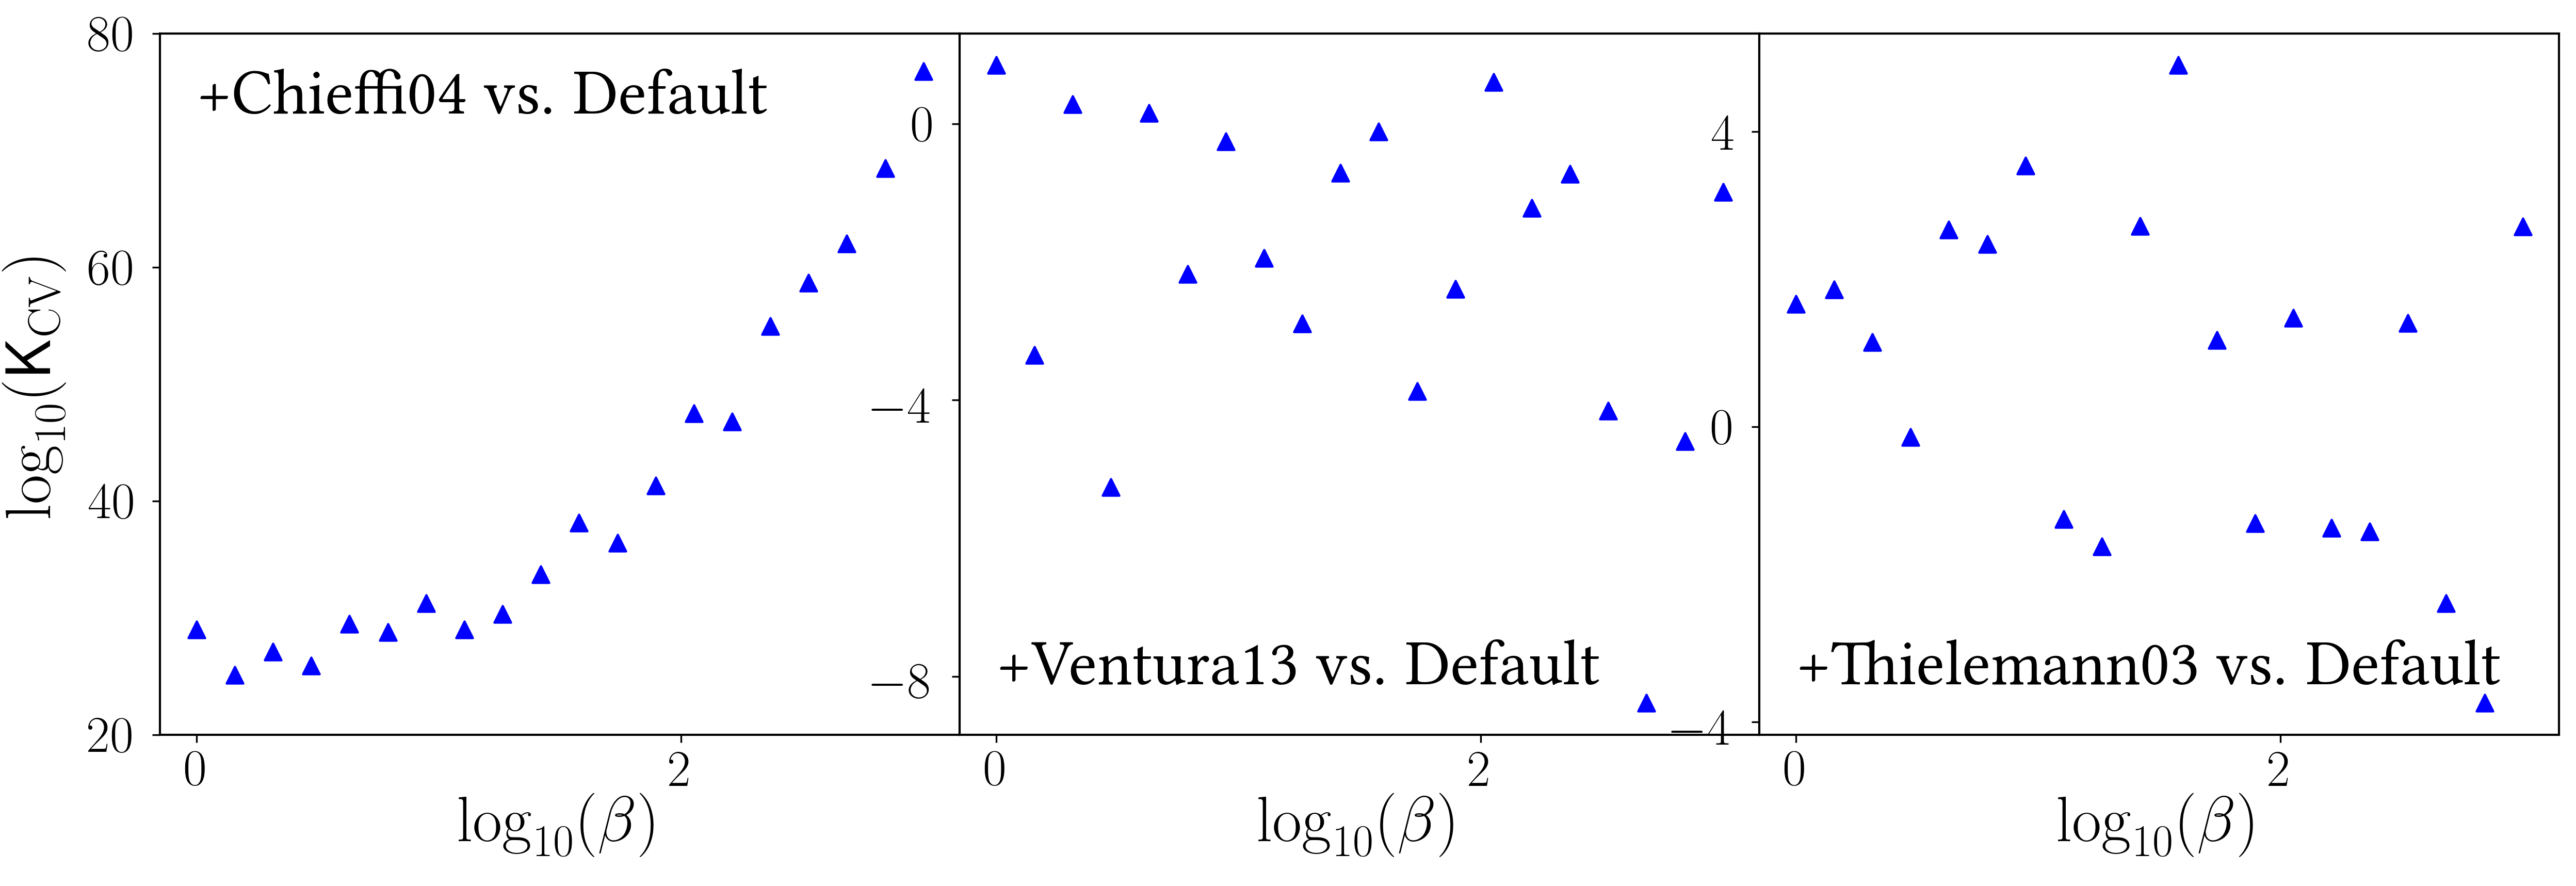

In [78]:
fig,axes = plt.subplots(nrows = 1, ncols = 3,figsize=(20.,6.),dpi=300)
text_size = 30
small_text = 30
axis_text = 24
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=axis_text)
plt.rc('ytick', labelsize=axis_text)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
alpha = 0.6
lw=2 # Linewidth
wspace = 0.0 # blankspace width between subplots
hspace = 0.0# blankspace height between subplots
plt.subplots_adjust(wspace=wspace,hspace=hspace)
# Create plot

for i in range(3):
    axes[i].locator_params(nbins=3)
    axes[i].scatter(np.log10(beta_param),np.log10(scores2[i+1]/scores2[0]),c='b',marker='^',s=60)
    axes[i].set_xlabel(r'$\log_{10}(\beta)$')
    if i == 0:
        axes[i].set_ylabel(r'$\log_{10}(\mathsf{K}_\mathrm{CV})$')
    if i == 0:
        axes[i].text(0.05, 0.95, str(names[i+1])+' vs. '+str(names[0]),verticalalignment='top', horizontalalignment='left',transform=axes[i].transAxes,color='k', fontsize=small_text)
    else:
        axes[i].text(0.05, 0.05, str(names[i+1])+' vs. '+str(names[0]),verticalalignment='bottom', horizontalalignment='left',transform=axes[i].transAxes,color='k', fontsize=small_text)
    
axes[0].set_yticks([20,40,60,80])
axes[1].set_yticks([-8,-4,0])
axes[2].set_yticks([-4,0,4])
plt.show()
#fig.savefig('PaperPlots/HoggComparison.pdf')


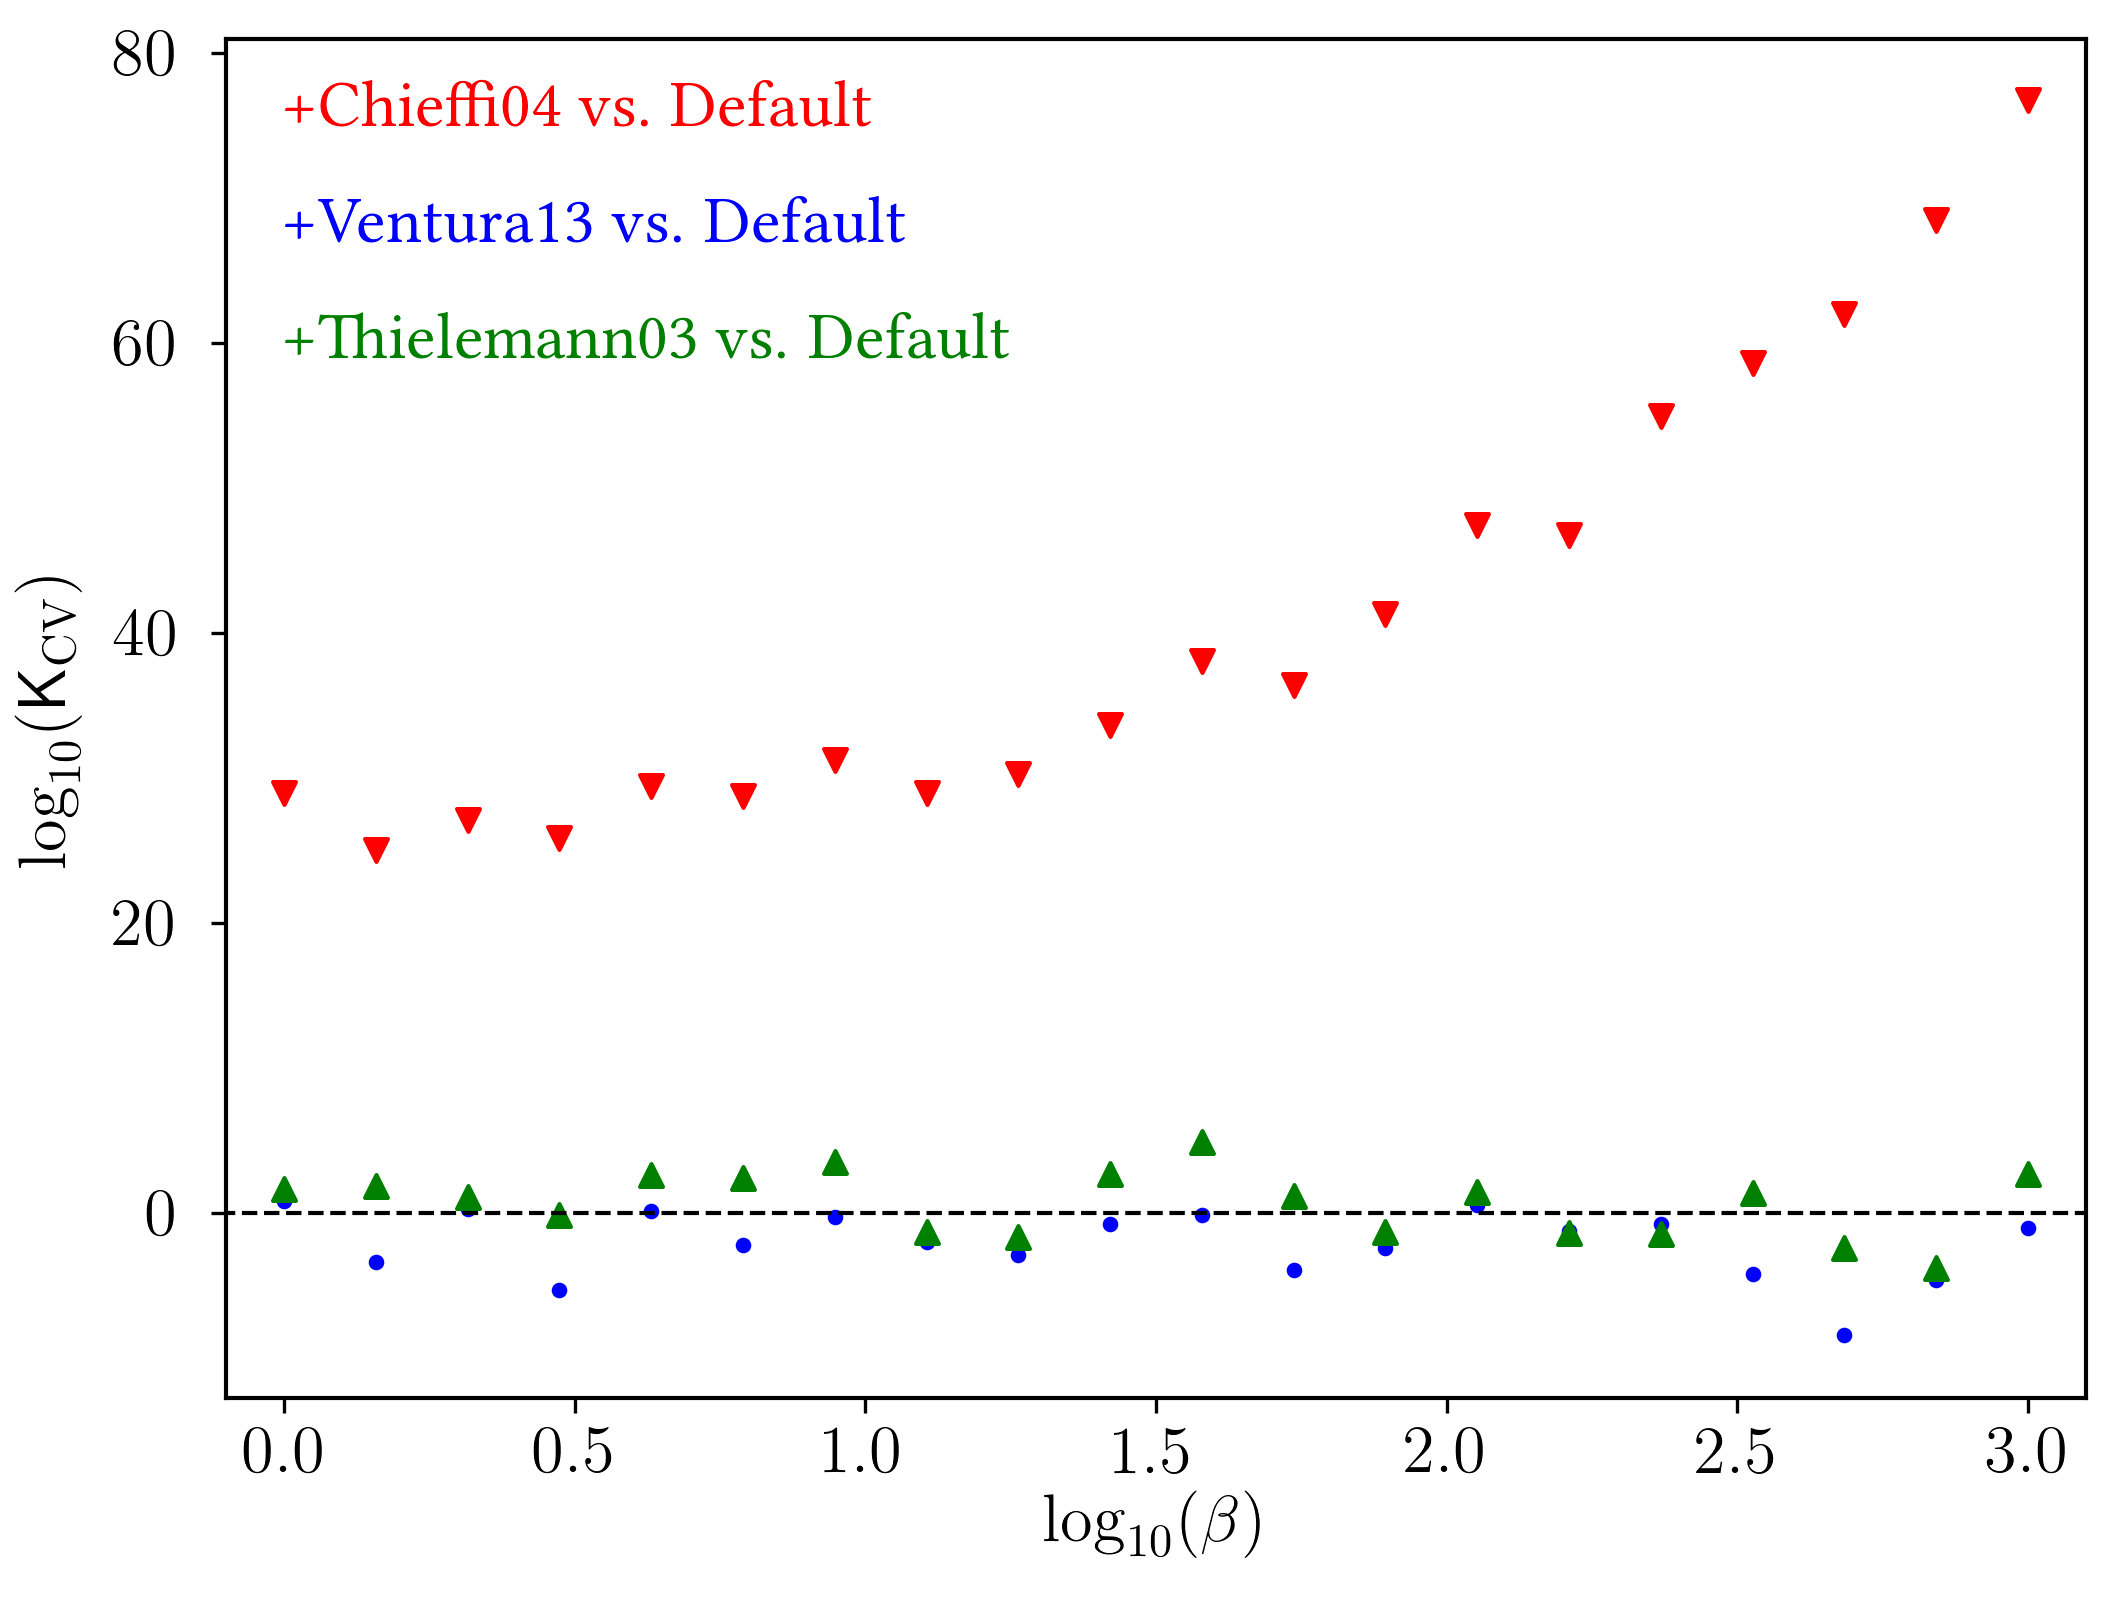

In [56]:
fig = plt.figure(figsize=(8.,6.),dpi=300)

text_size = 16
small_text = 20
axis_text = 16
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=axis_text)
plt.rc('ytick', labelsize=axis_text)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
w=2 # Linewidth
labels = [str(item)+" vs. "+str(names[0]) for item in names[1:]]
colors = ['r','b','g']
shapes = ['v','.','^']
# Create plot
for i in range(3):
    plt.scatter(np.log10(beta_param),np.log10(scores2[i+1]/scores2[0]),c=colors[i],marker=shapes[i],s=30,label=labels[i])
    plt.text(0.0,75-8*i, labels[i],color=colors[i])
    
plt.plot(np.linspace(-1,4),np.zeros_like(np.linspace(-1,4)),'k--')
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathsf{K}_\mathrm{CV})$')
plt.xlim([-0.1,3.1])



#plt.legend()
plt.show()
fig.savefig('PaperPlots/HoggComparison.pdf',bbox_inches="tight")


## No Sc scores

In [85]:
# Load datasets
B_Chi = np.load('/home/philcox/Save/New_SCORES/Chieffi/Bayes_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
B_Def = np.load('/home/philcox/Save/New_SCORES/Default/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
B_Chi_noSc = np.load('/home/philcox/Save/New_SCORES/ChieffiNoSc/Bayes_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
B_Def_noSc = np.load('/home/philcox/Save/New_SCORES/DefaultNoSc/Bayes_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
beta_param = B_Chi['beta_param']
scoreBC = B_Chi['score']
scoreBD = B_Def['score']
scoreBCnSc = B_Chi_noSc['score']
scoreBDnSc = B_Def_noSc['score']
score_errBC = B_Chi['score_err']
score_errBD = B_Def['score_err']
score_errBCnSc = B_Chi_noSc['score_err']
score_errBDnSc = B_Def_noSc['score_err']
B_Chi.close()
B_Def.close()
B_Chi_noSc.close()
B_Def_noSc.close()

In [86]:
scores3 = [scoreBD,scoreBC,scoreBDnSc,scoreBCnSc]
errors3 = [score_errBD,score_errBC,score_errBDnSc,score_errBCnSc]
names3 = ['Default','+Chieffi04','Default-Sc', '+Chieffi04-Sc']
shapes = ['x','v','.','^']
colors = ['k','r','b','g']

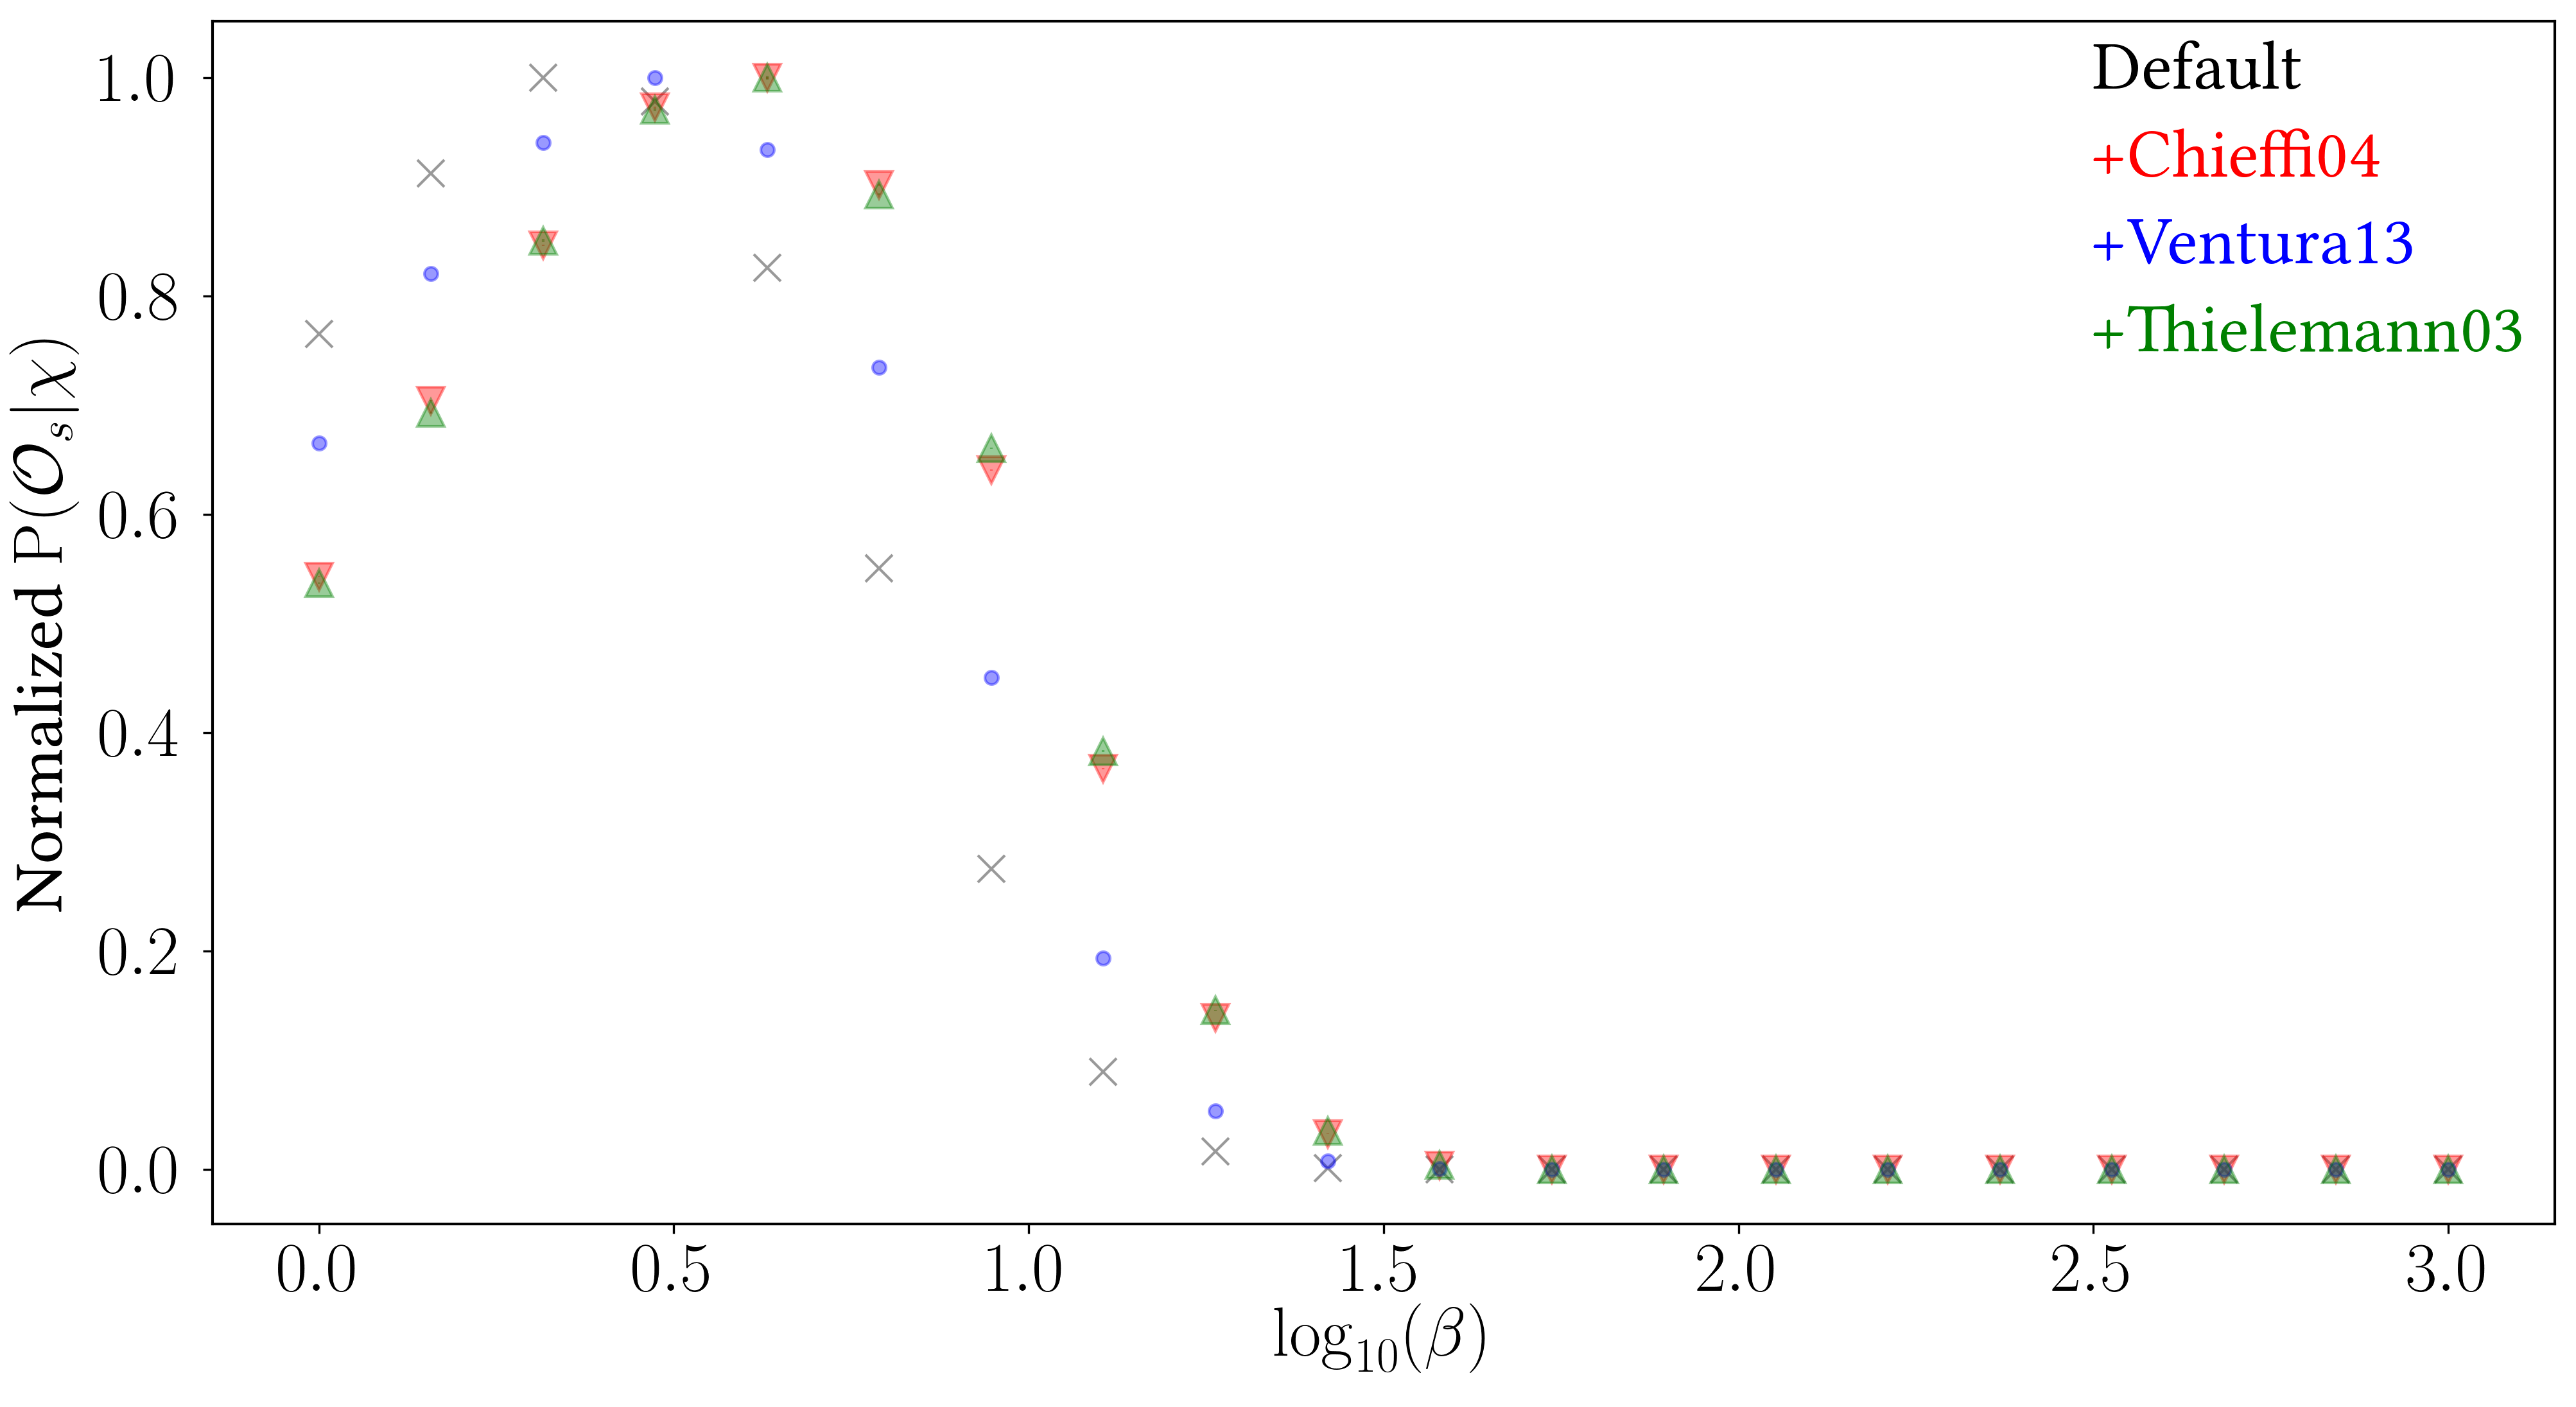

In [90]:
# Plot parameters
text_size = 26
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)
      

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),scores3[i]/max(scores3[i]),yerr=errors3[i],fmt=shapes[i],label=names3[i],ms=10,c=colors[i],alpha=0.4) 
    plt.text(2.5,0.99-0.08*i, names[i],color=colors[i])

plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'Normalized $\mathrm{P}(\mathcal{O}_s|\chi)$')
#plt.title('Rescaled Bayesian evidence')
#plt.legend()
plt.savefig('PaperPlots/NoScRescaledEvidence.pdf',bbox_inches="tight")

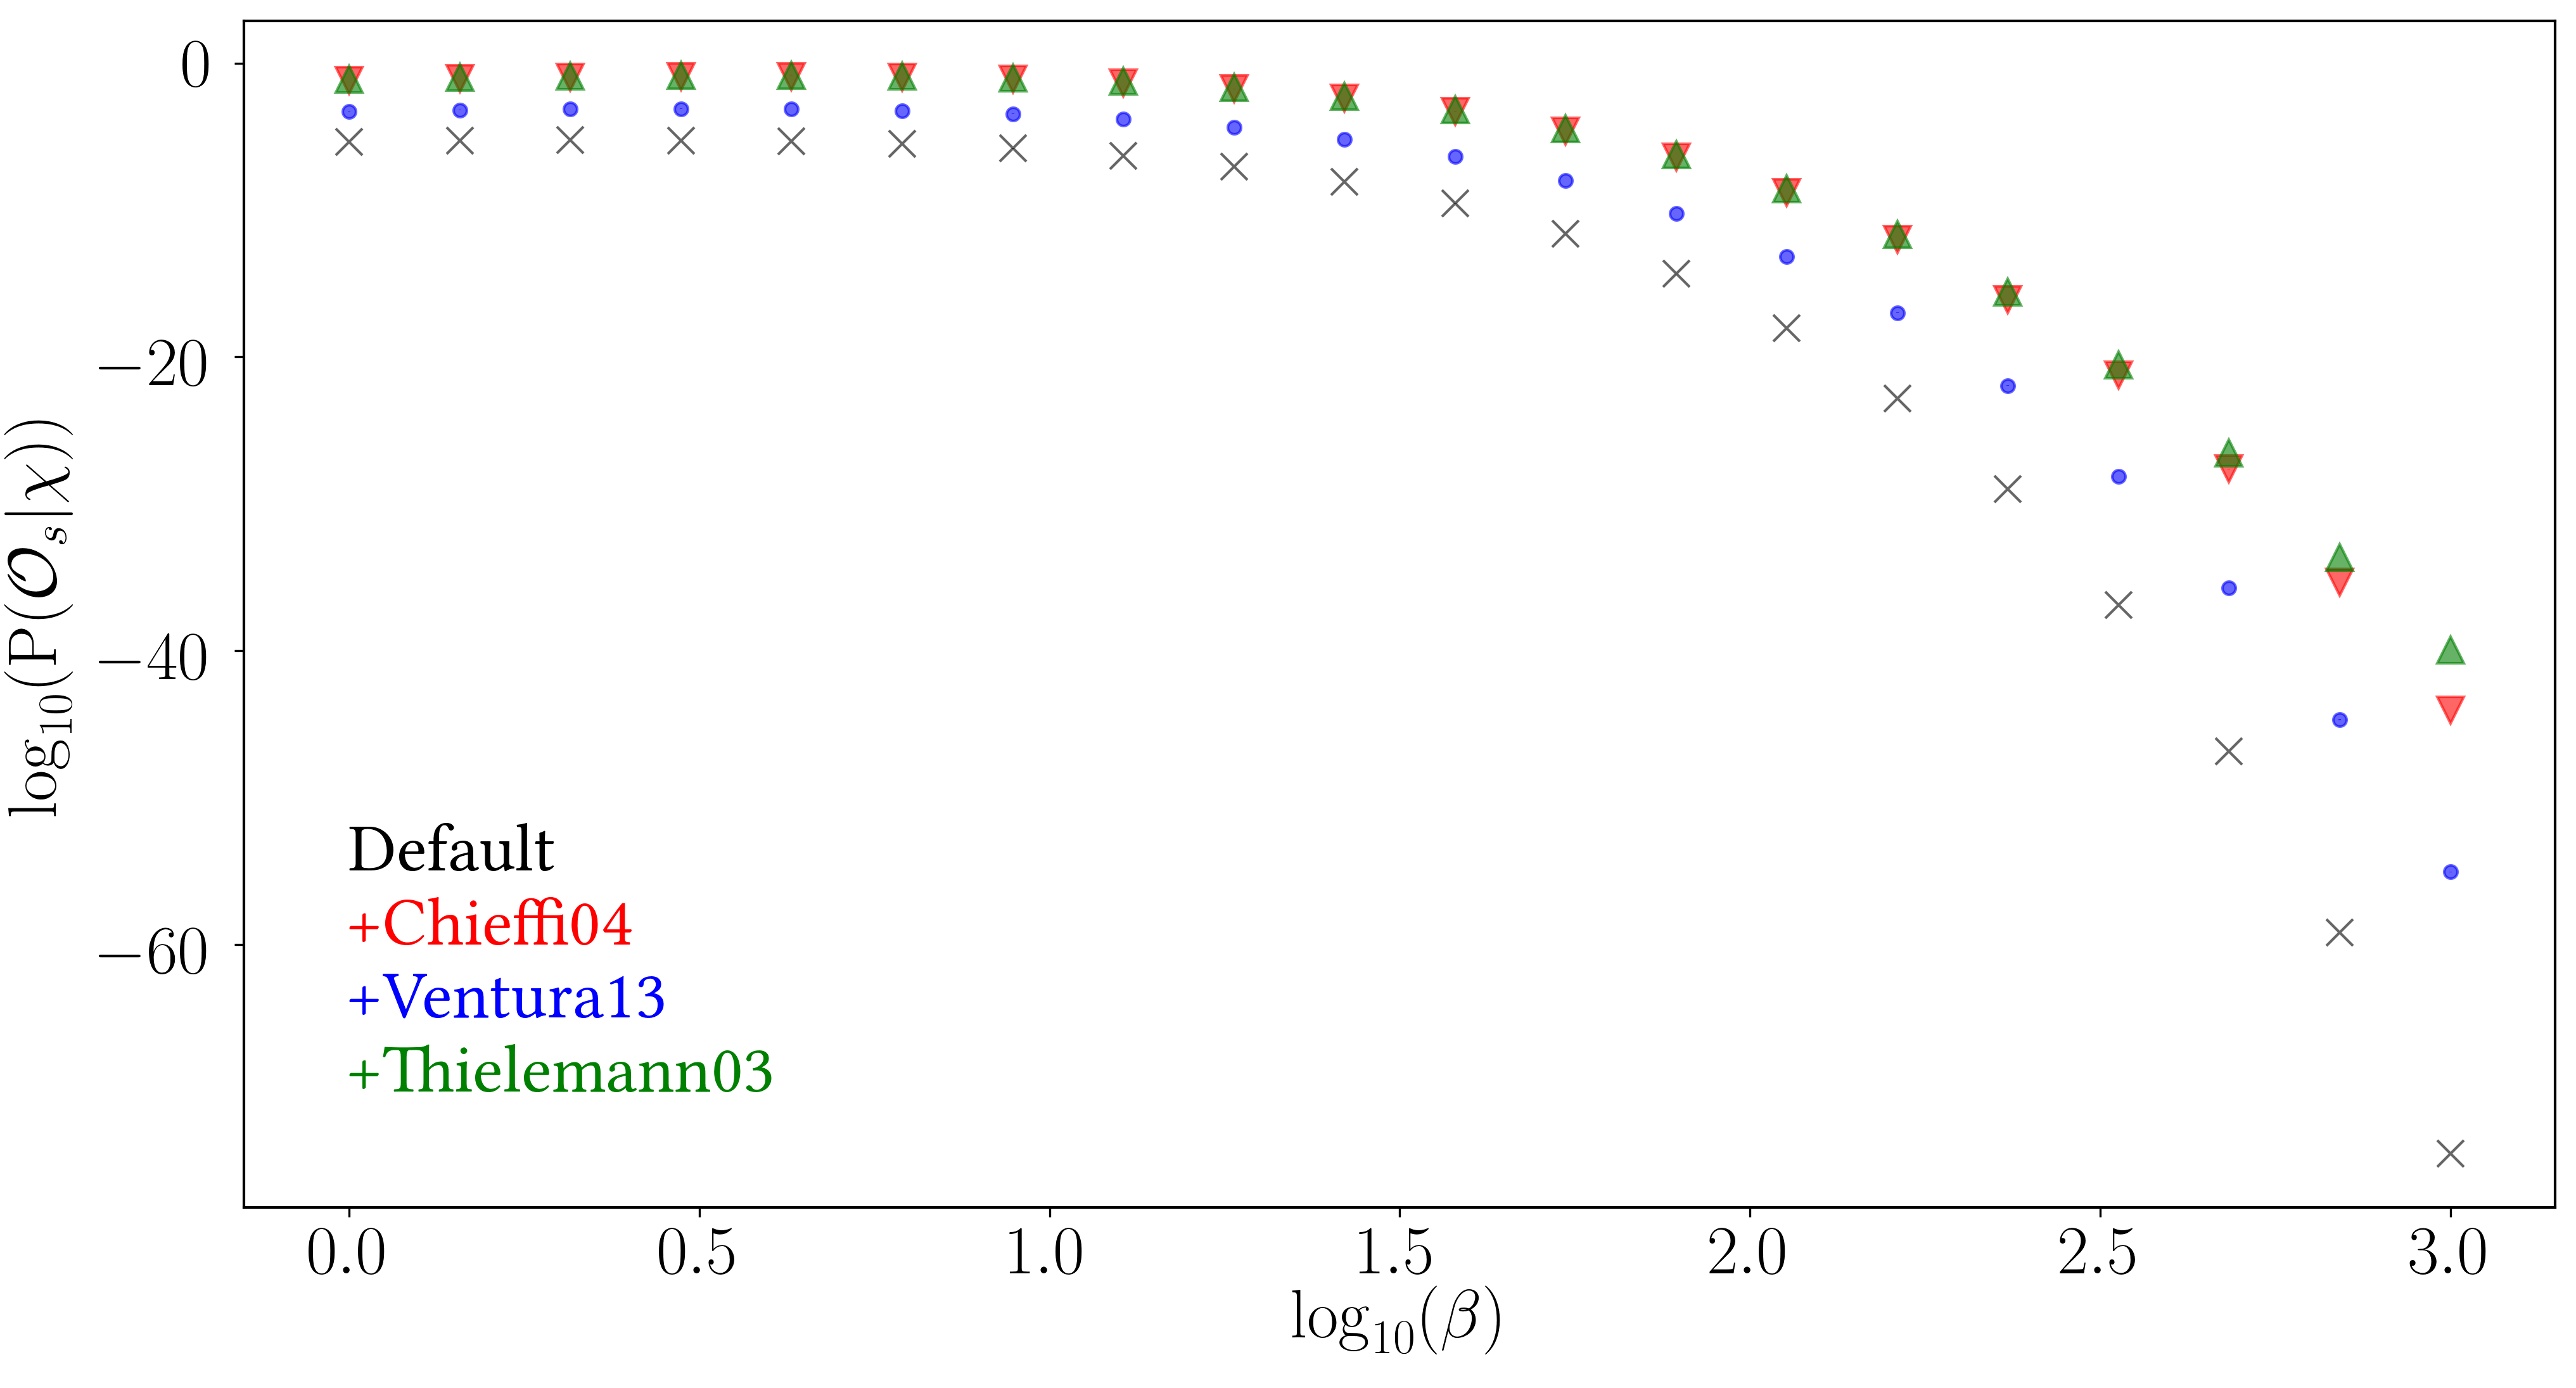

In [94]:
text_size = 26
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)

for i in [0,1,2,3]:
    log_error = errors3[i]/(scores3[i]*np.log(10))
    plt.errorbar(np.log10(beta_param),np.log10(scores3[i]),fmt=shapes[i],yerr = log_error,label=names3[i],c=colors[i],ms=10,alpha=0.6) 
    plt.text(0.0,-55-5*i, names[i],color=colors[i])

plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathrm{P}(\mathcal{O}_s|\chi))$')
#plt.legend()
#plt.title('Logarithmic Bayesian evidences')
plt.savefig('PaperPlots/NoSclogEvidence.pdf')

In [65]:
# Load datasets
H_Chi = np.load('/home/philcox/Save/New_SCORES/Chieffi/Hogg_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
H_Def = np.load('/home/philcox/Save/New_SCORES/Default/Hogg_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
H_Chi_noSc = np.load('/home/philcox/Save/New_SCORES/ChieffiNoSc/Hogg_score - chieffi04_net, Karakas_net_yield, Seitenzahl.npz')
H_Def_noSc = np.load('/home/philcox/Save/New_SCORES/DefaultNoSc/Hogg_score - Nomoto2013_net, Karakas_net_yield, Seitenzahl.npz')
beta_param = H_Chi['beta_param']
scoreHC = H_Chi['score']
scoreHD = H_Def['score']
scoreHC_noSc = H_Chi_noSc['score']
scoreHD_noSc = H_Def_noSc['score']
H_Chi.close()
H_Def.close()
H_Chi_noSc.close()
H_Def_noSc.close()

In [79]:
scores4 = [scoreHD,scoreHC,scoreHD_noSc,scoreHC_noSc]
names4 = ['Default','+Chieffi04','Default-Sc', '+Chieffi04-Sc']
colors4= ['k','r','b','g']
shapes4 = ['x','v','.','^']

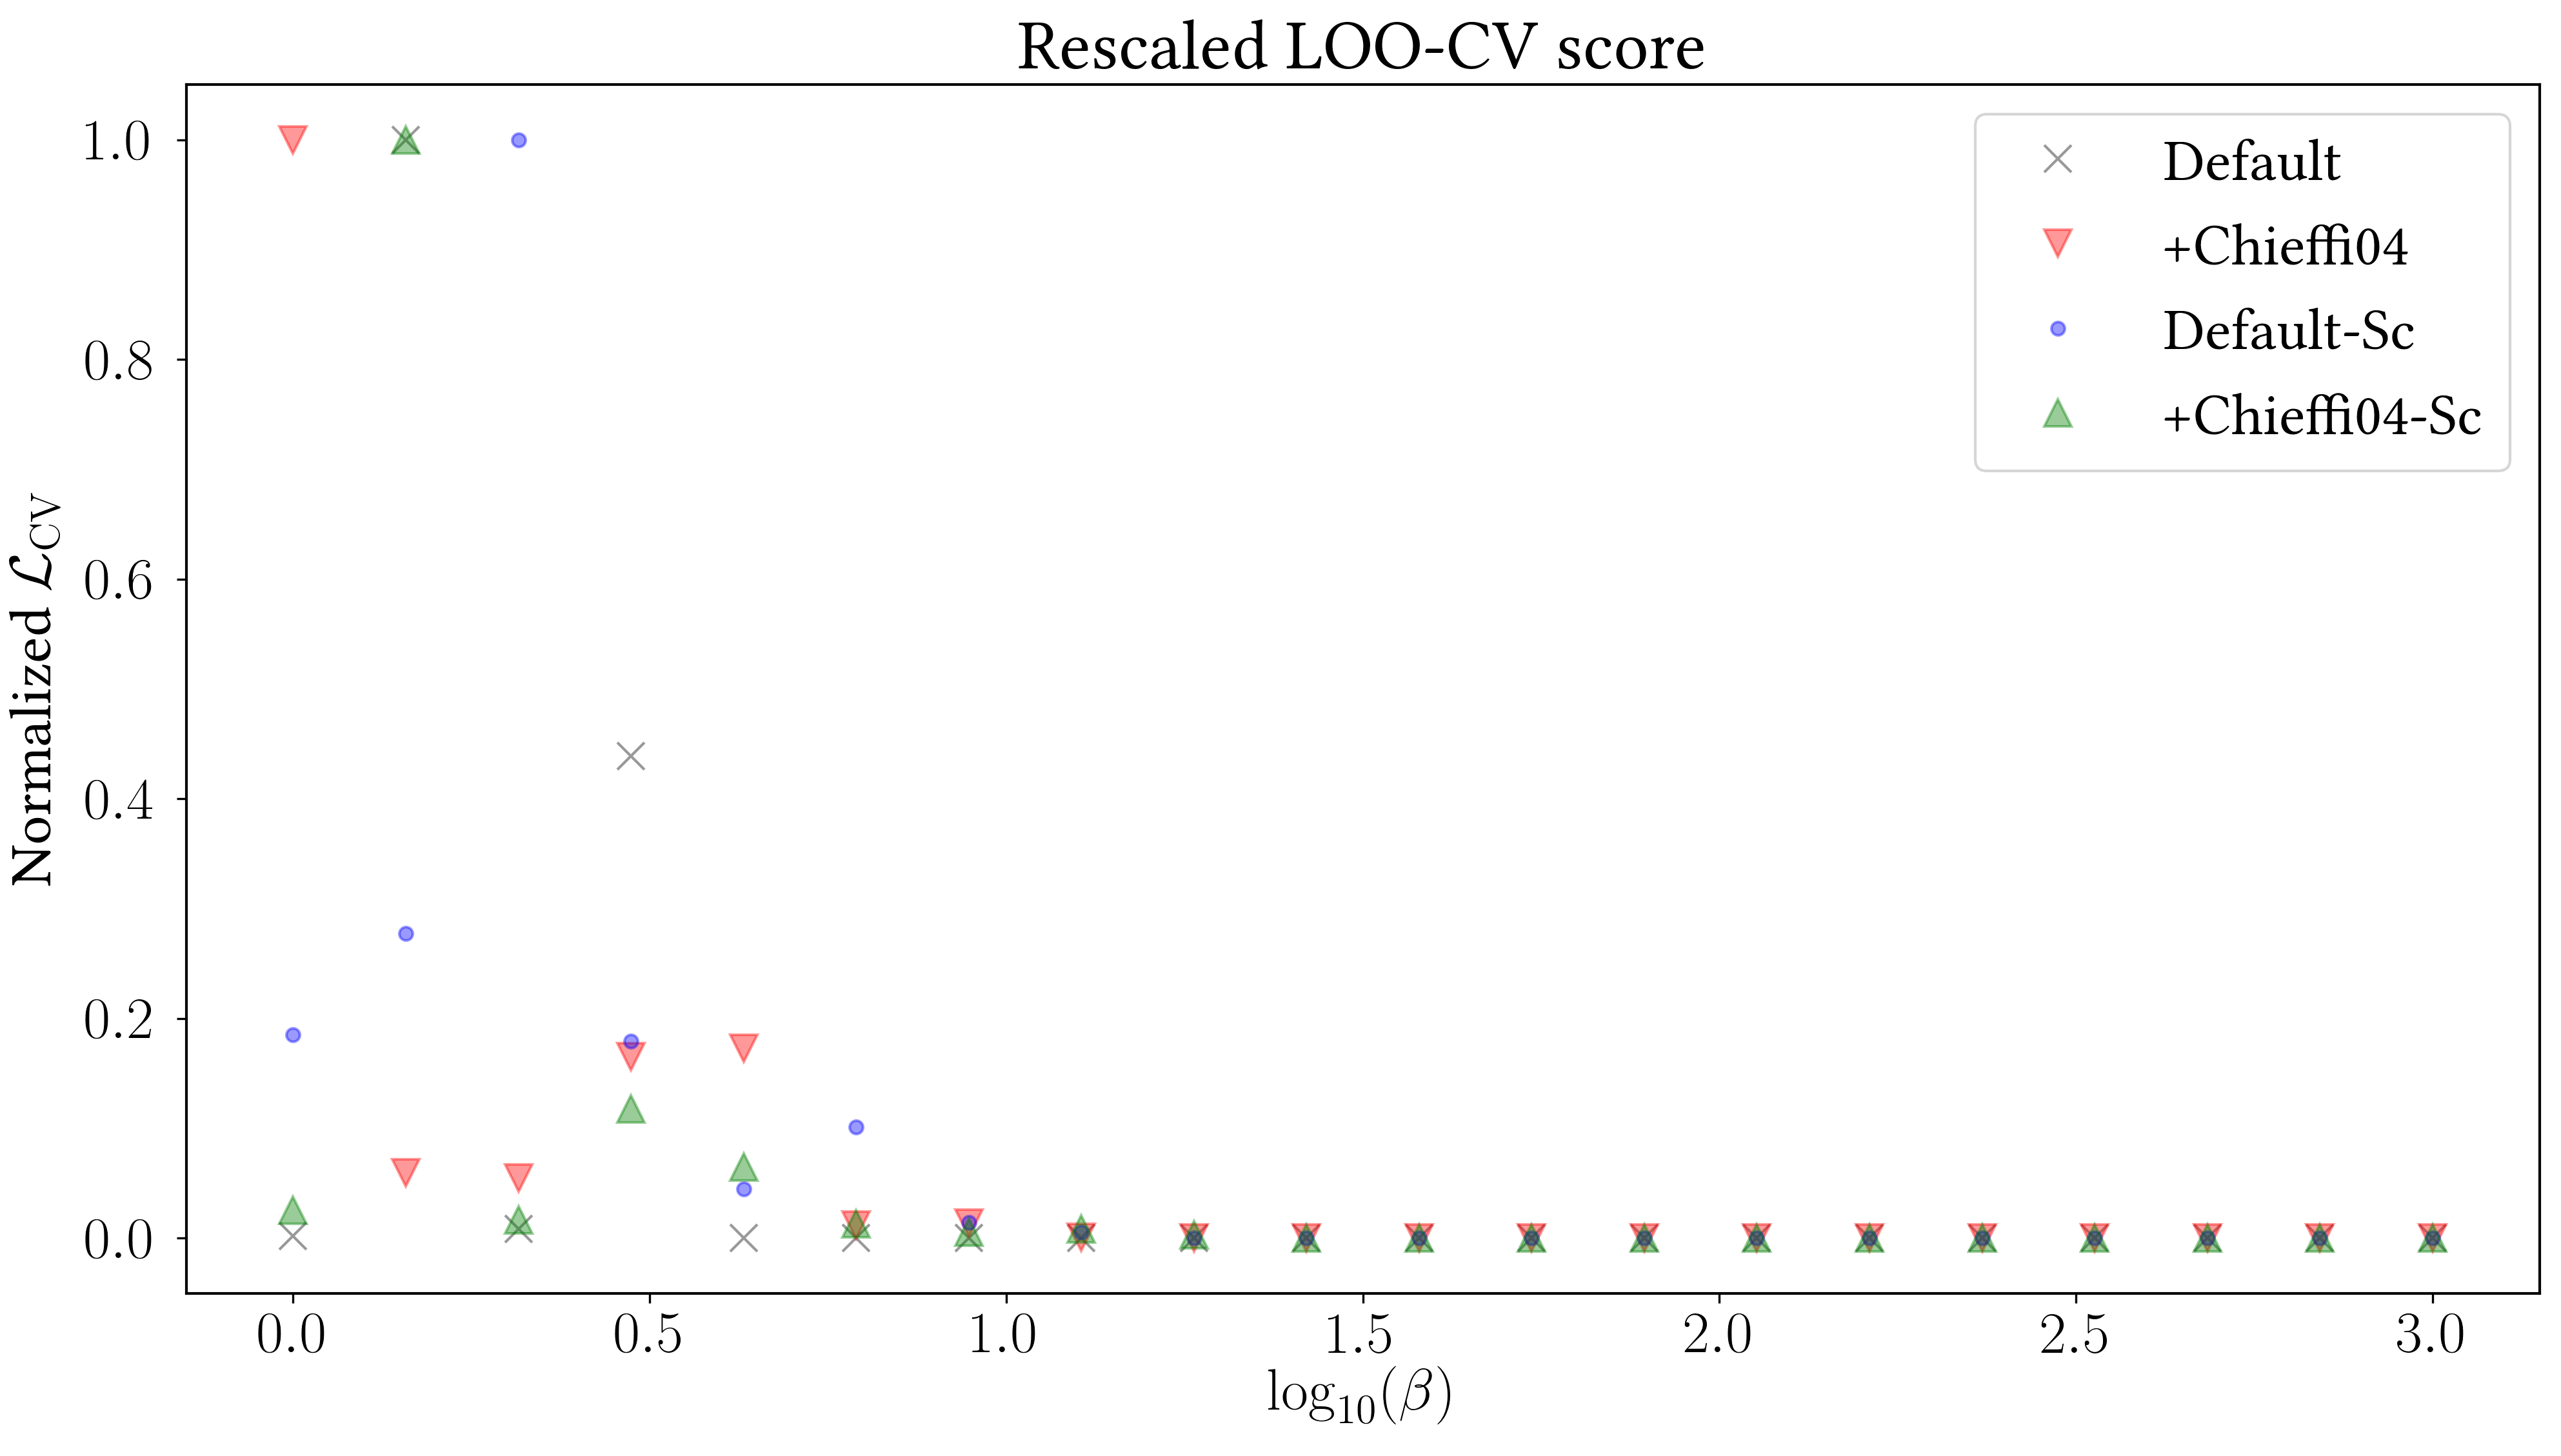

In [97]:
# Plot parameters
text_size = 22
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)
      

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),scores4[i]/max(scores4[i]),fmt=shapes[i],label=names4[i],ms=10,c=colors[i],alpha=0.4) 
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'Normalized $\mathcal{L}_\mathrm{CV}$')
plt.title('Rescaled LOO-CV score')
plt.legend()
plt.savefig('PaperPlots/NewnoScRescaledHogg.pdf')

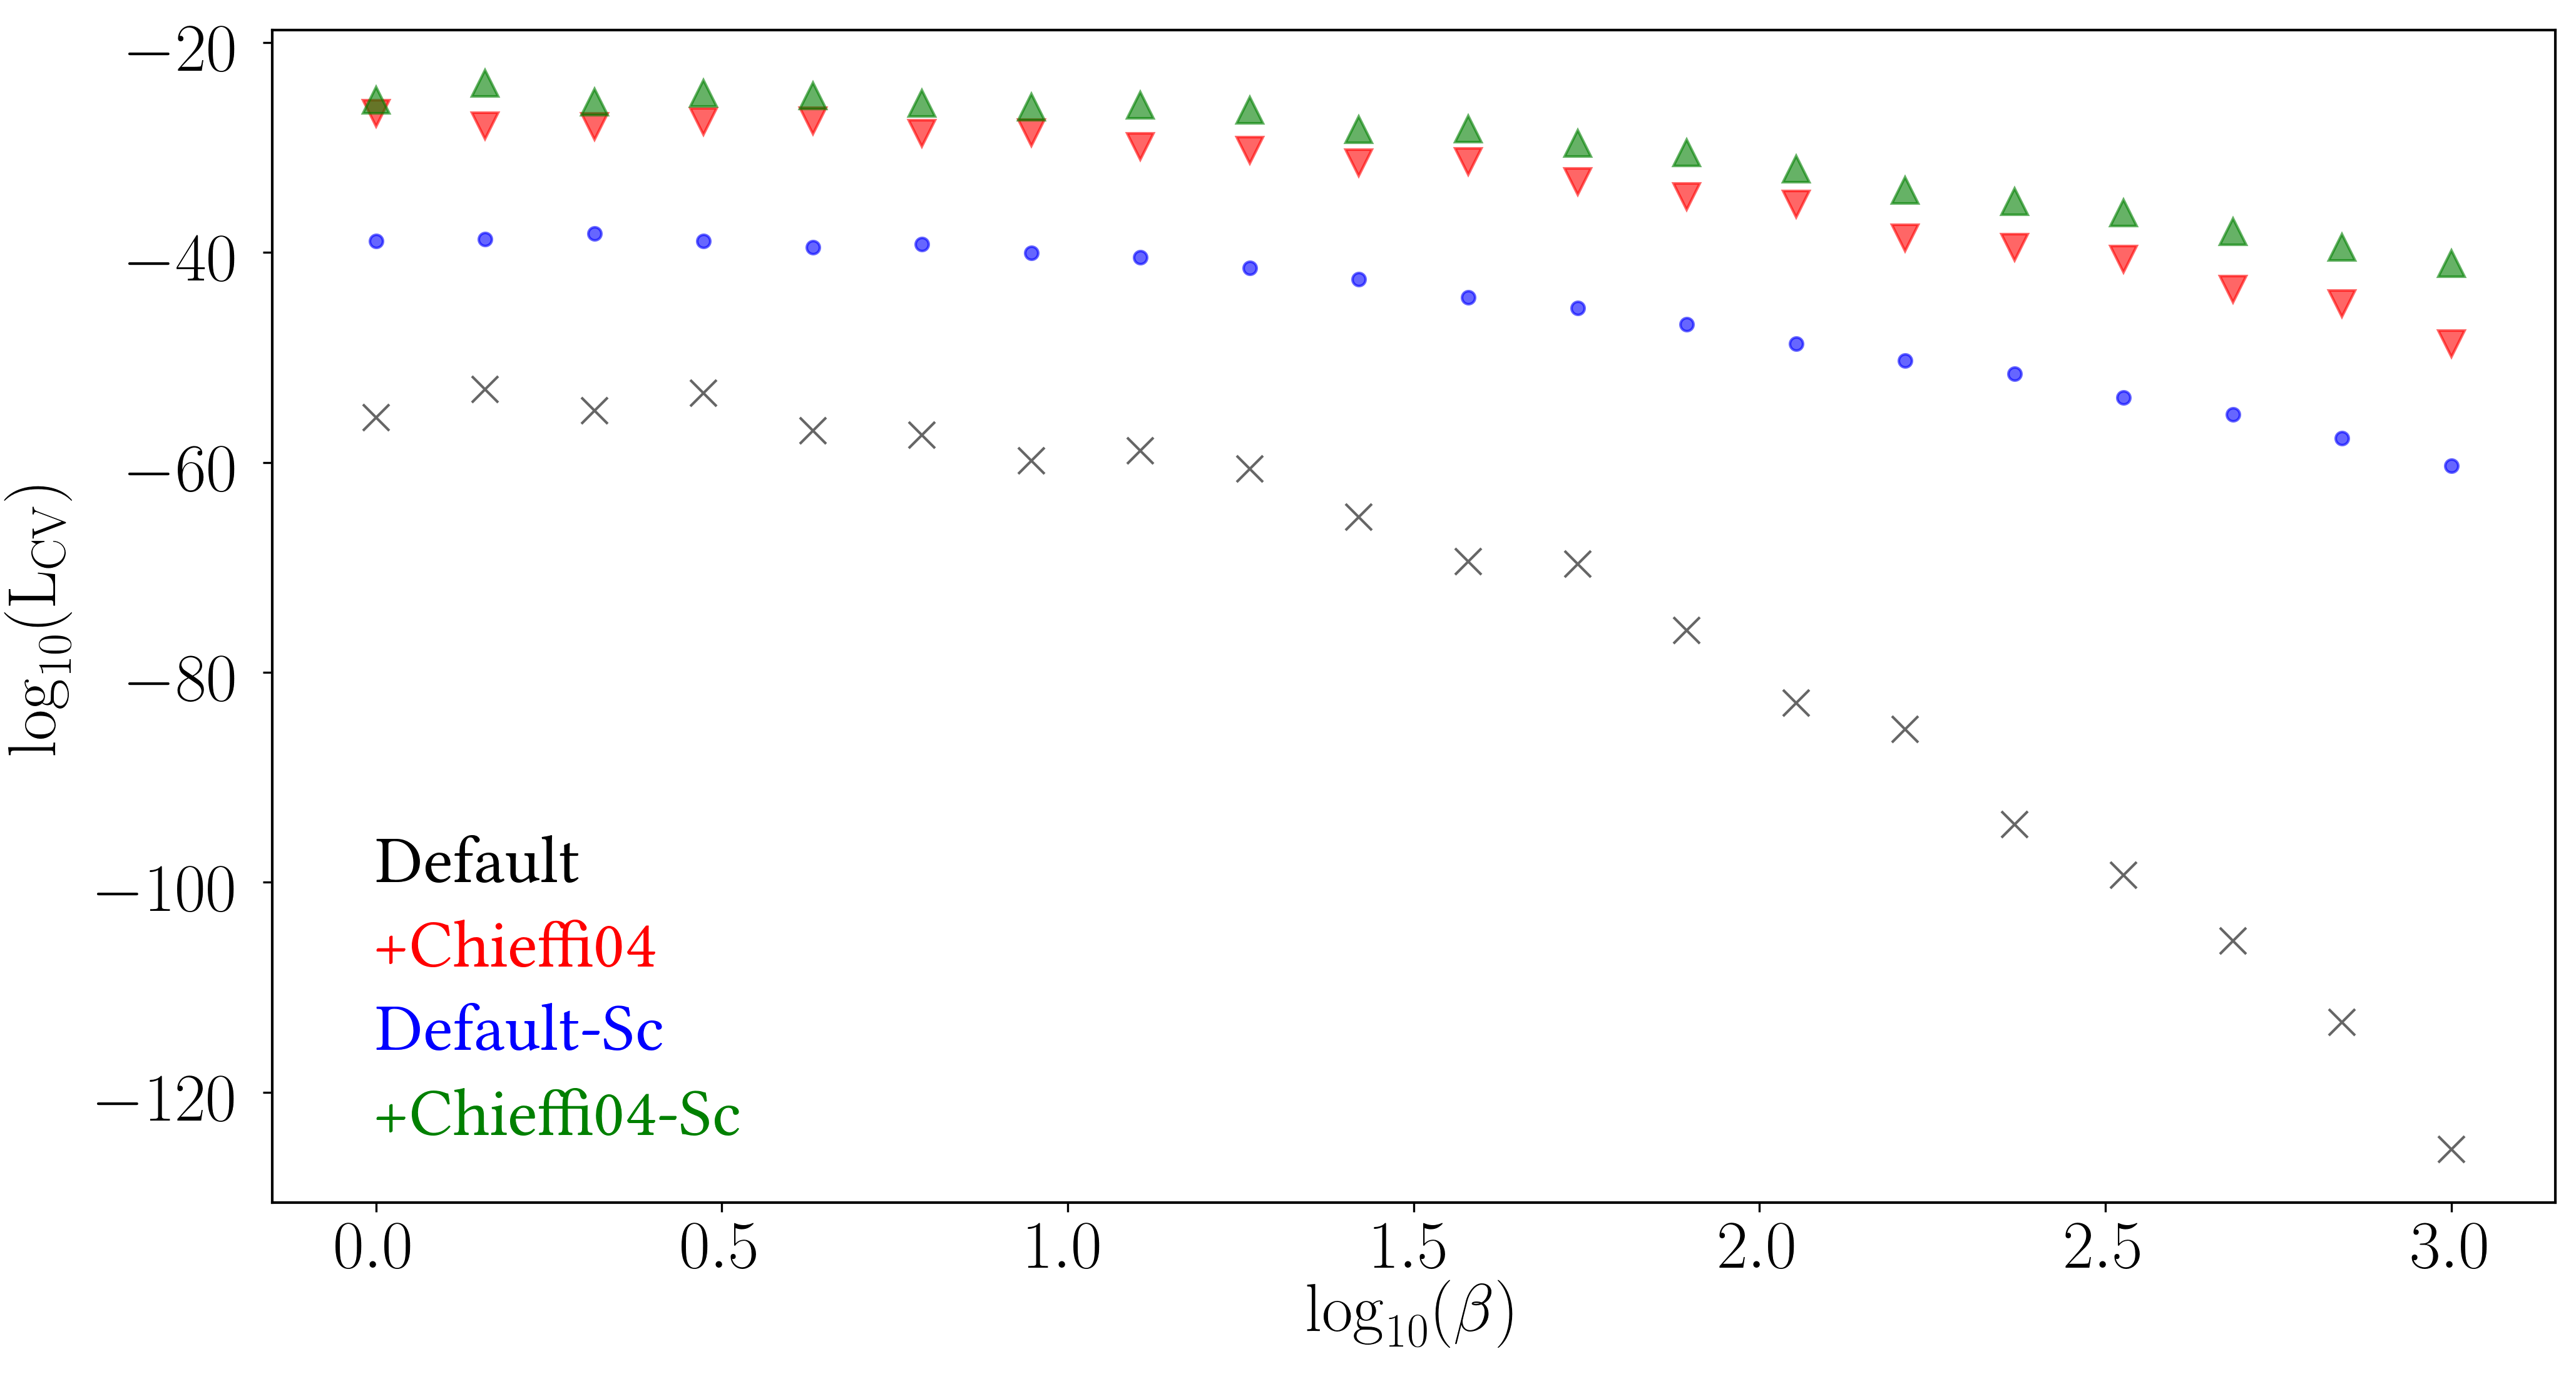

In [83]:
text_size = 26
plt.rc('font', family='serif',size = text_size)
plt.rc('xtick', labelsize=text_size)
plt.rc('ytick', labelsize=text_size)
plt.rc('axes', labelsize=text_size, lw=1.0)
plt.rc('lines', linewidth = 1)
plt.rcParams['ytick.major.pad']='8'
plt.rcParams['text.latex.preamble']=[r"\usepackage{libertine}"]
params = {'text.usetex' : True,
        'font.family' : 'libertine',
        'text.latex.unicode': True}
plt.rcParams.update(params)
fig = plt.figure(figsize=(15.69,8.27), dpi=300)

for i in [0,1,2,3]:
    plt.errorbar(np.log10(beta_param),np.log10(scores4[i]),fmt=shapes4[i],label=names4[i],c=colors4[i],ms=10,alpha=0.6) 
    plt.text(0.0,-100-8*i, names4[i],color=colors4[i])
    
plt.xlabel(r'$\log_{10}(\beta)$')
plt.ylabel(r'$\log_{10}(\mathrm{L}_\mathrm{CV})$')
#plt.title('Logarithmic LOO-CV scores')
plt.savefig('PaperPlots/NoSclogHogg.pdf',bbox_inches="tight")

In [37]:
dat = np.load('/home/philcox/Save/New_SCORES/Default/Hogg_beta_elements26.36651.npz')
dat2 = np.load('/home/philcox/Save/New_SCORES/Chieffi/Hogg_beta_elements26.36651.npz')

In [41]:
for i in range(len(dat['elements'])):
    print(dat['elements'][i],dat['likelihood_factors'][i])
    #if i != 27:
    print(dat2['elements'][i],dat2['likelihood_factors'][i])

Al 3.22434570053
Al 3.16921282528
Ar 2.29391223771
Ar 2.22382191724
C 1.55843554309
C 0.94506702701
Ca 5.11589163163
Ca 5.26735598677
Cl 4.70918697689e-06
Cl 2.45985293489e-07
Co 0.00754723912911
Co 0.00532689169126
Cr 0.582793472298
Cr 0.515455684182
Cu 3.37081414157
Cu 3.19809441322
F 3.5759673823
F 3.66330617722
Fe 2.90019152877
Fe 2.88736651987
Ga 0.330520269471
Ga 0.140181001195
Ge 0.0148327445503
Ge 0.00148278197877
He 3.54694277164
He 3.18157692608
K 1.13286342077e-13
K 9.46045449373e-15
Mg 4.36751474544
Mg 4.19574118556
Mn 0.512249993784
Mn 0.311094452629
N 1.51271628952
N 1.57611883501
Na 0.0416291036533
Na 0.0205478521765
Ne 0.427555444175
Ne 0.334351585041
Ni 0.68045656256
Ni 0.584807559031
O 1.38317092652
O 1.33325252018
P 4.24598641589
P 4.05531019412
S 0.00130463048467
S 0.00119916765887
Sc 1.74292646925e-16
Sc 2.08289347126e-26
Si 0.000177762584512
Si 1.50733587107e-05
Ti 5.75848261797e-07
Ti 2.69587672666e-07
V 0.127842105854
V 0.126385599888
Zn 3.80564510483
Zn 3.67000

In [39]:
np.load('/home/philcox/Save/New_SCORES/Default/Hogg_elements.npy')

array(['Al', 'Ar', 'C', 'Ca', 'Cl', 'Co', 'Cr', 'Cu', 'F', 'Fe', 'Ga',
       'Ge', 'He', 'K', 'Mg', 'Mn', 'N', 'Na', 'Ne', 'Ni', 'O', 'P', 'S',
       'Sc', 'Si', 'Ti', 'V', 'Zn'], 
      dtype='<U2')

In [45]:
np.load('/home/philcox/Save/New_SCORES/Chieffi/Hogg_elements.npy')

array(['Al', 'Ar', 'C', 'Ca', 'Cl', 'Co', 'Cr', 'Cu', 'F', 'Fe', 'Ga',
       'Ge', 'He', 'K', 'Mg', 'Mn', 'N', 'Na', 'Ne', 'Ni', 'O', 'P', 'S',
       'Sc', 'Si', 'Ti', 'V', 'Zn'], 
      dtype='<U2')